In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('ecommerce_customer_churn_dataset.csv')

In [58]:
df.head()

Age  Gender Country        City  Membership_Years  Login_Frequency  \
0  43.0    Male  France   Marseille               2.9             14.0   
1  36.0    Male      UK  Manchester               1.6             15.0   
2  45.0  Female  Canada   Vancouver               2.9             10.0   
3  56.0  Female     USA    New York               2.6             10.0   
4  35.0    Male   India       Delhi               3.1             29.0   

   Session_Duration_Avg  Pages_Per_Session  Cart_Abandonment_Rate  \
0                  27.4                6.0                   50.6   
1                  42.7               10.3                   37.7   
2                  24.8                1.6                   70.9   
3                  38.4               14.8                   41.7   
4                  51.4                NaN                   19.1   

   Wishlist_Items  ...  Email_Open_Rate  Customer_Service_Calls  \
0             3.0  ...             17.9                     9.0   
1             1.0  ...             42.8                     7.0   
2             1.0  ...              0.0                     4.0   
3             9.0  ...             41.4                     2.0   
4             9.0  ...             37.9                     1.0   

   Product_Reviews_Written  Social_Media_Engagement_Score  Mobile_App_Usage  \
0                      4.0                           16.3              20.8   
1                      3.0                            NaN              23.3   
2                      1.0                            NaN               8.8   
3                      5.0                           85.9              31.0   
4                     11.0                           83.0              50.4   

   Payment_Method_Diversity  Lifetime_Value  Credit_Balance  Churned  \
0                       1.0          953.33          2278.0        0   
1                       3.0         1067.47          3028.0        0   
2                       NaN         1289.75          2317.0        0   
3                       3.0         2340.92          2674.0        0   
4                       4.0         3041.29          5354.0        0   

   Signup_Quarter  
0              Q1  
1              Q4  
2              Q4  
3              Q1  
4              Q4  

[5 rows x 25 columns]

# Nulls

=== MISSINGNESS PER COLUMN ===
                               Missing_Count  Missing_Percentage
Social_Media_Engagement_Score           6000              12.000
Credit_Balance                          5500              11.000
Mobile_App_Usage                        5000              10.000
Returns_Rate                            4491               8.982
Wishlist_Items                          4000               8.000
Product_Reviews_Written                 3500               7.000
Discount_Usage_Rate                     3500               7.000
Session_Duration_Avg                    3399               6.798
Pages_Per_Session                       3000               6.000
Days_Since_Last_Purchase                3000               6.000
Email_Open_Rate                         2528               5.056
Payment_Method_Diversity                2500               5.000
Age                                     2495               4.990
Customer_Service_Calls                   168               

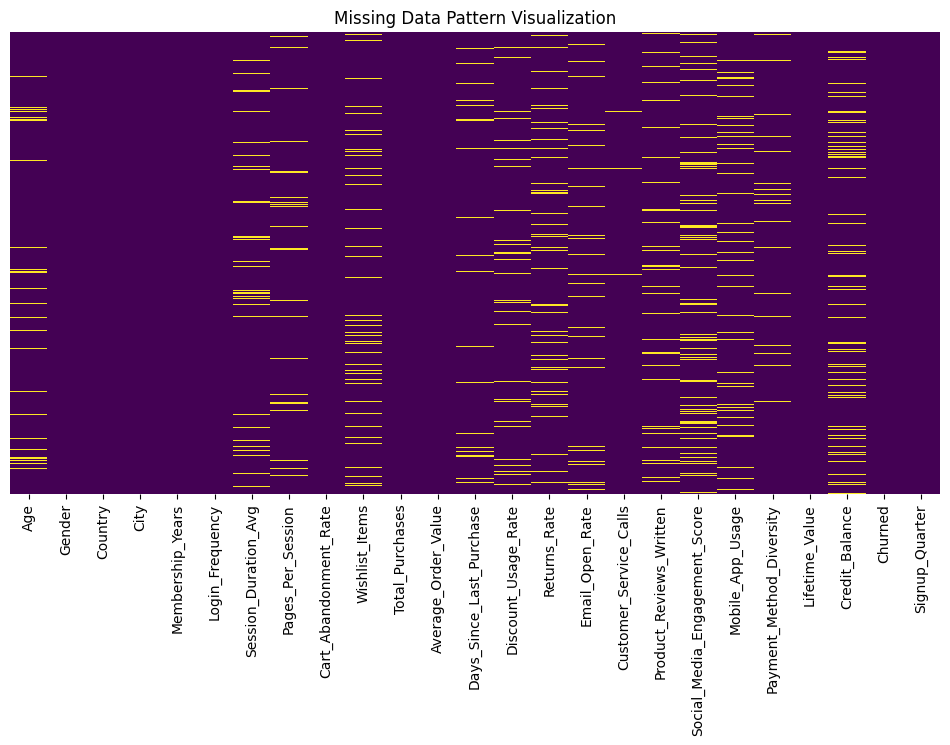

In [59]:
# Calculate missingness per column
missing_summary = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
}).sort_values('Missing_Percentage',ascending=False)

print("=== MISSINGNESS PER COLUMN ===")
print(missing_summary[missing_summary['Missing_Count'] > 0])

# 2. Check for rows that are completely empty (unlikely but good to check)
print(f"\n=== ROWS WITH ALL DATA MISSING ===")
print(f"Count: {df.isnull().all(axis=1).sum()}")

# 3. Create a missing data heatmap to see patterns
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Pattern Visualization')
plt.show()

In [60]:
df.dtypes

Age                              float64
Gender                            object
Country                           object
City                              object
Membership_Years                 float64
Login_Frequency                  float64
Session_Duration_Avg             float64
Pages_Per_Session                float64
Cart_Abandonment_Rate            float64
Wishlist_Items                   float64
Total_Purchases                  float64
Average_Order_Value              float64
Days_Since_Last_Purchase         float64
Discount_Usage_Rate              float64
Returns_Rate                     float64
Email_Open_Rate                  float64
Customer_Service_Calls           float64
Product_Reviews_Written          float64
Social_Media_Engagement_Score    float64
Mobile_App_Usage                 float64
Payment_Method_Diversity         float64
Lifetime_Value                   float64
Credit_Balance                   float64
Churned                            int64
Signup_Quarter  

# Fill NAN with calculations

In [61]:
Age_mean = df.groupby(['Gender', 'City', 'Country'])['Age'].transform('median') 
df['Age'].fillna(Age_mean, inplace=True)
print(df['Age'].isnull().sum())

0


In [62]:
df['Pages_Per_Session'].fillna(df['Pages_Per_Session'].mean(), inplace=True)
df['Days_Since_Last_Purchase'].fillna(df['Days_Since_Last_Purchase'].median(), inplace=True)
df['Customer_Service_Calls'].fillna(df['Customer_Service_Calls'].mode()[0], inplace=True)
df['Product_Reviews_Written'].fillna(df['Product_Reviews_Written'].median(), inplace=True)
df['Discount_Usage_Rate'].fillna(0, inplace=True)
df['Wishlist_Items'].fillna(0, inplace=True)
df['Returns_Rate'].fillna(0, inplace=True)
df['Mobile_App_Usage'].fillna(0, inplace=True)
df['Credit_Balance'].fillna(0, inplace=True)
df['Social_Media_Engagement_Score'].fillna(df['Social_Media_Engagement_Score'].mode()[0], inplace=True)

In [63]:
method_diversity = df.groupby(['Age', 'Gender'])['Payment_Method_Diversity'].transform('nunique')
df['Payment_Method_Diversity'].fillna(method_diversity, inplace=True)

In [64]:
df.drop(columns=['Email_Open_Rate'], inplace=True)

In [65]:
median_valid = df.loc[df['Age'] <= 100, 'Age'].median()
df.loc[df['Age'] > 100, 'Age'] = median_valid

df.to_csv('ecommerce_customer_churn_dataset_cleaned.csv')

# Clasify

In [66]:
df['Age'] = df['Age'].astype('int32')
df['Login_Frequency'] = df['Login_Frequency'].astype('int32')
df['Wishlist_Items'] = df['Wishlist_Items'].astype('int32')
df['Days_Since_Last_Purchase'] = df['Days_Since_Last_Purchase'].astype('int32')
df['Customer_Service_Calls'] = df['Customer_Service_Calls'].astype('int32')
df['Product_Reviews_Written'] = df['Product_Reviews_Written'].astype('int32')
df['Payment_Method_Diversity'] = df['Payment_Method_Diversity'].astype('int32')
df['Credit_Balance'] = df['Credit_Balance'].astype('int32')
df['Churned'] = df['Churned'].astype('int8')

In [67]:
# Create a new binary column 'adult' based on 'Age'
df['adult'] = np.where(df['Age'] >= 18, 'Over 18', 'Under 18')

# Variable analisis

In [68]:
df.describe()

Age  Membership_Years  Login_Frequency  Session_Duration_Avg  \
count  50000.000000      50000.000000     50000.000000          46601.000000   
mean      37.730620          2.984009        11.624660             27.660754   
std       11.182785          2.059105         7.810657             10.871013   
min        5.000000          0.100000         0.000000              1.000000   
25%       30.000000          1.400000         6.000000             19.700000   
50%       37.000000          2.500000        11.000000             26.800000   
75%       45.000000          4.000000        17.000000             34.700000   
max       75.000000         10.000000        46.000000             75.600000   

       Pages_Per_Session  Cart_Abandonment_Rate  Wishlist_Items  \
count       50000.000000           50000.000000    50000.000000   
mean            8.737811              57.079973        3.954520   
std             3.663118              16.282723        3.274206   
min             1.000000               0.000000        0.000000   
25%             6.200000              46.400000        1.000000   
50%             8.700000              58.100000        3.000000   
75%            11.000000              68.700000        6.000000   
max            24.100000             143.743350       28.000000   

       Total_Purchases  Average_Order_Value  Days_Since_Last_Purchase  \
count     50000.000000         50000.000000              50000.000000   
mean         13.111576           123.117330                 29.265300   
std           7.017312           175.569714                 28.866043   
min         -13.000000            26.380000                  0.000000   
25%           8.000000            87.050000                  9.000000   
50%          12.000000           112.970000                 21.000000   
75%          17.000000           144.440000                 39.000000   
max         128.700000          9666.379178                287.000000   

       Discount_Usage_Rate  Returns_Rate  Customer_Service_Calls  \
count         50000.000000  50000.000000            50000.000000   
mean             39.057661      6.080833                5.679540   
std              23.230984      6.164110                2.671844   
min               0.000000      0.000000                0.000000   
25%              21.700000      2.100000                4.000000   
50%              37.900000      4.900000                5.000000   
75%              55.560000      8.600000                7.000000   
max             116.640000     99.615734               21.000000   

       Product_Reviews_Written  Social_Media_Engagement_Score  \
count             50000.000000                   50000.000000   
mean                  2.793580                      25.840730   
std                   2.256482                      21.530263   
min                   0.000000                       0.000000   
25%                   1.000000                       5.700000   
50%                   2.000000                      23.700000   
75%                   4.000000                      40.700000   
max                  21.000000                     100.000000   

       Mobile_App_Usage  Payment_Method_Diversity  Lifetime_Value  \
count      50000.000000              50000.000000    50000.000000   
mean          17.434446                  2.485280     1440.626292   
std           10.659451                  1.225044      907.249443   
min            0.000000                  0.000000        0.000000   
25%           10.200000                  2.000000      789.817500   
50%           17.200000                  2.000000     1243.415000   
75%           24.600000                  3.000000     1874.000000   
max           61.900000                  5.000000     8987.240000   

       Credit_Balance       Churned  
count    50000.000000  50000.000000  
mean      1749.947600      0.289000  
std       1309.277071      0.453302  
min          0.000000      0.000000  
25%        647.000000 

In [69]:
df.dtypes

Age                                int32
Gender                            object
Country                           object
City                              object
Membership_Years                 float64
Login_Frequency                    int32
Session_Duration_Avg             float64
Pages_Per_Session                float64
Cart_Abandonment_Rate            float64
Wishlist_Items                     int32
Total_Purchases                  float64
Average_Order_Value              float64
Days_Since_Last_Purchase           int32
Discount_Usage_Rate              float64
Returns_Rate                     float64
Customer_Service_Calls             int32
Product_Reviews_Written            int32
Social_Media_Engagement_Score    float64
Mobile_App_Usage                 float64
Payment_Method_Diversity           int32
Lifetime_Value                   float64
Credit_Balance                     int32
Churned                             int8
Signup_Quarter                    object
adult           

In [70]:
# Calculate missingness per column
missing_summary = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
}).sort_values('Missing_Percentage',ascending=False)

print(missing_summary[missing_summary['Missing_Count'] > 0])

                      Missing_Count  Missing_Percentage
Session_Duration_Avg           3399               6.798


# Categorical vs Categorical

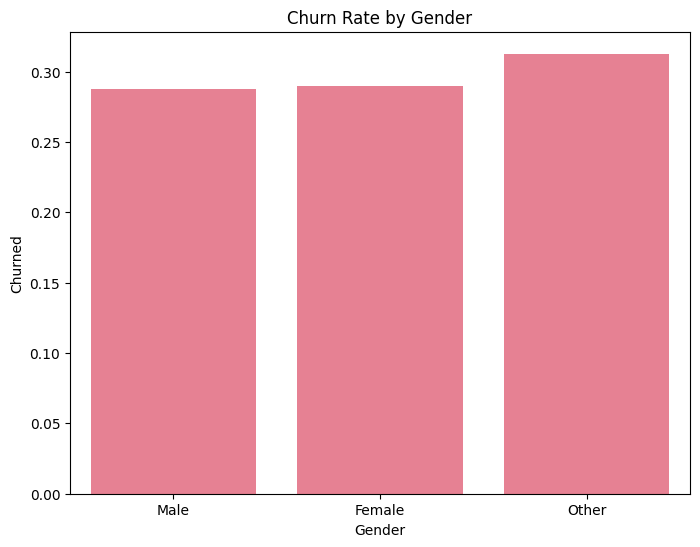

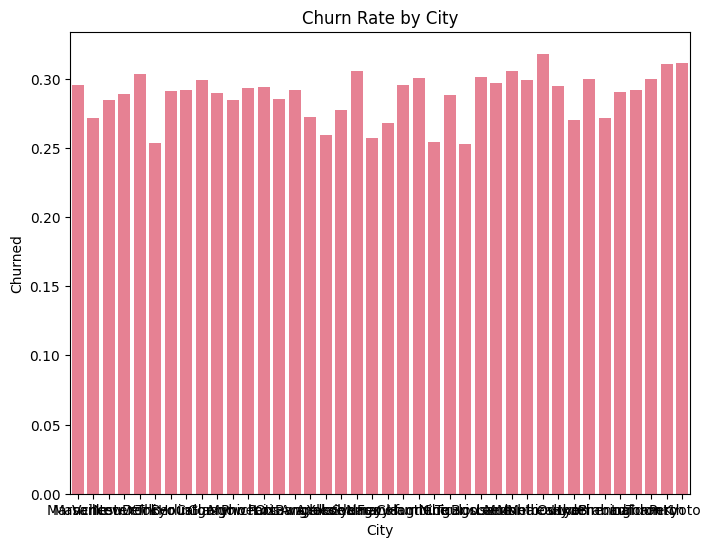

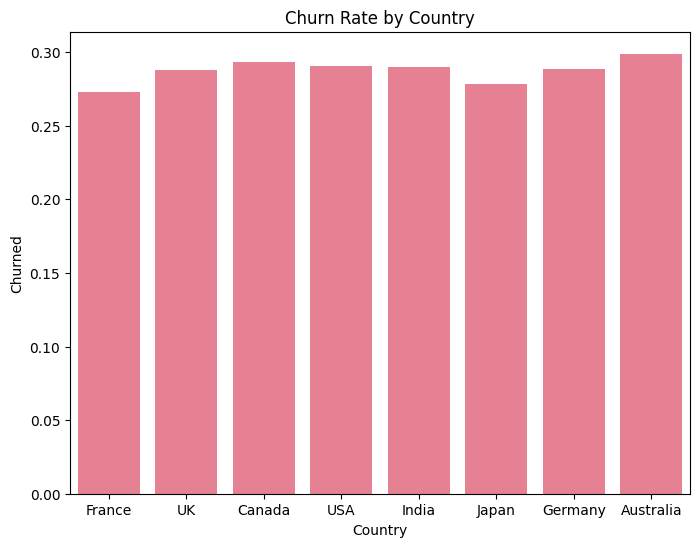

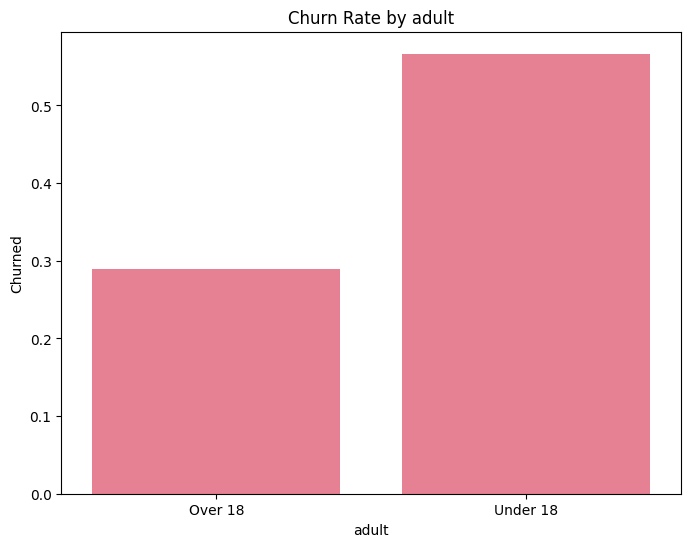

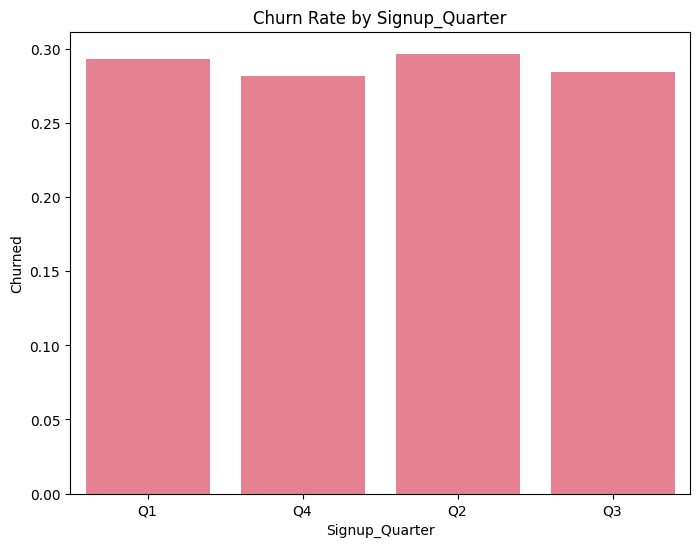

In [71]:
Cat_cols = ['Gender', 'City', 'Country', 'adult', 'Signup_Quarter']
for col in Cat_cols:
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.barplot(data=df, x=col, y='Churned', ax=ax, ci=None)
        plt.title(f'Churn Rate by {col}')

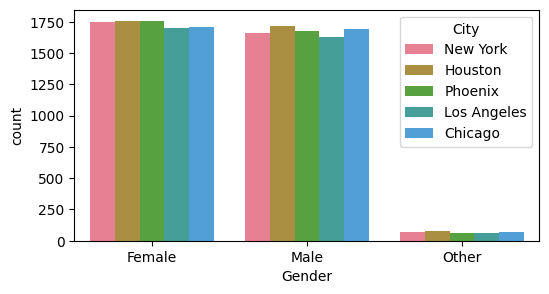

In [72]:
fig, ax = plt.subplots(figsize=(6, 3))
USA_filter = df[df['Country'] == 'USA']
sns.countplot(x='Gender', hue='City', data=USA_filter, ax=ax)
plt.show()

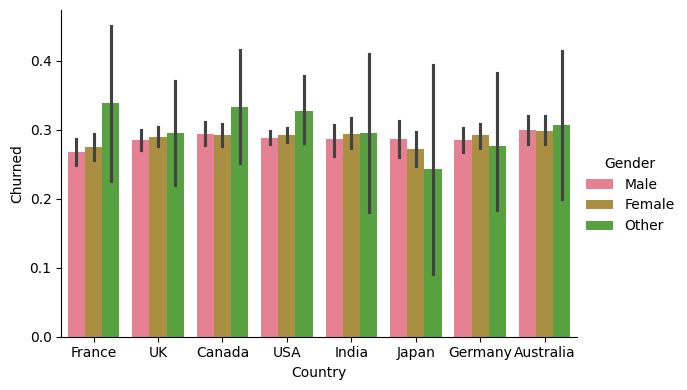

In [73]:
sns.catplot(x='Country', y='Churned', hue='Gender', data=df, kind='bar', height=4, aspect=1.5)

# categorical / numerical

In [74]:
num_cols = ['Age', 'Login_Frequency', 'Social_Media_Engagement_Score', 
                     'Customer_Service_Calls', 'Product_Reviews_Written', 
                     'Payment_Method_Diversity', 'Discount_Usage_Rate', 
                     'Wishlist_Items', 'Returns_Rate', 'Mobile_App_Usage', 
                     'Credit_Balance']

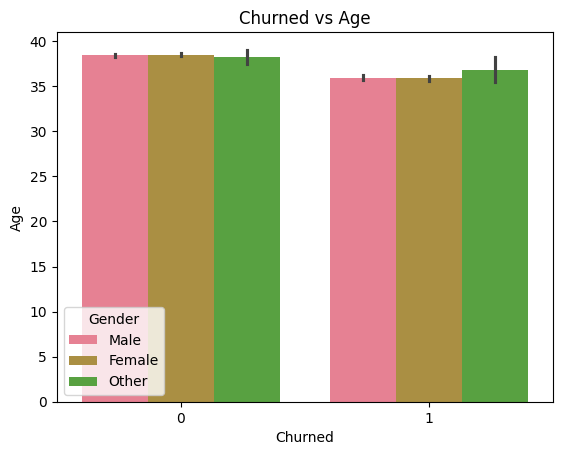

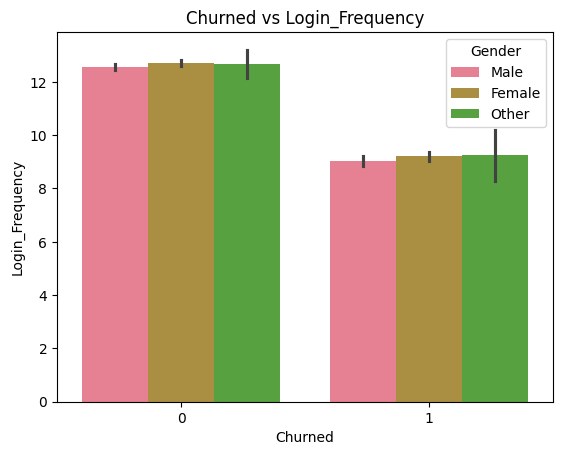

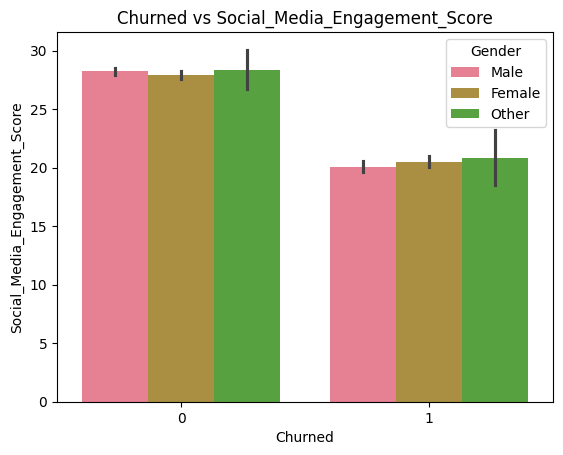

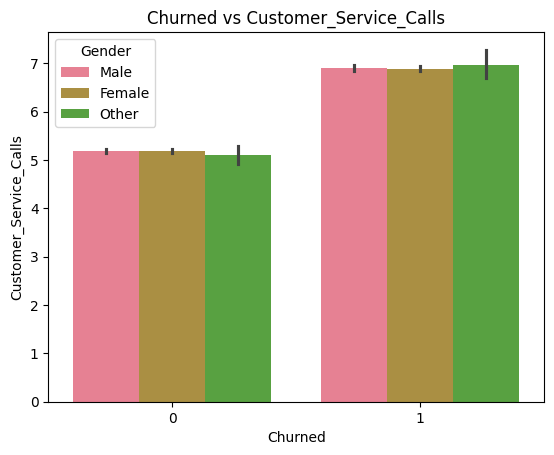

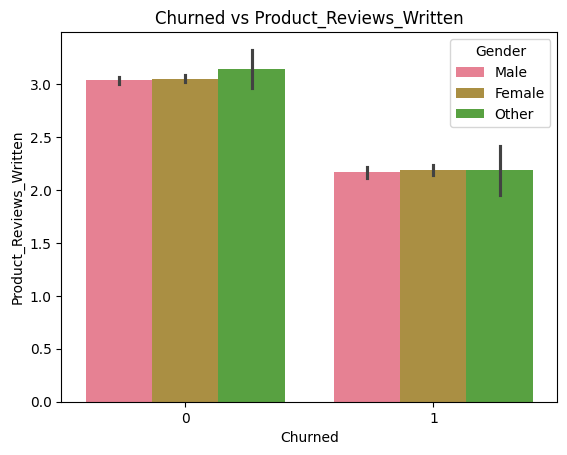

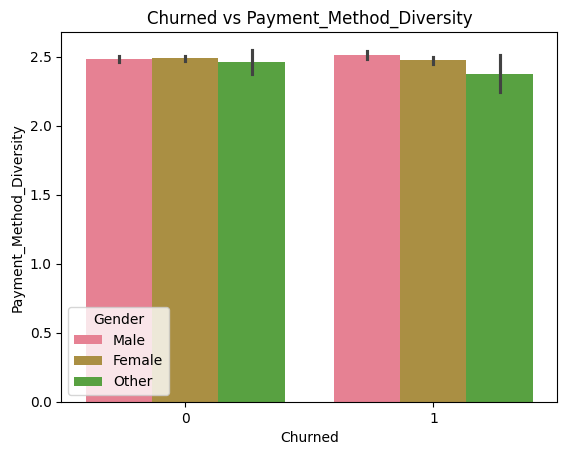

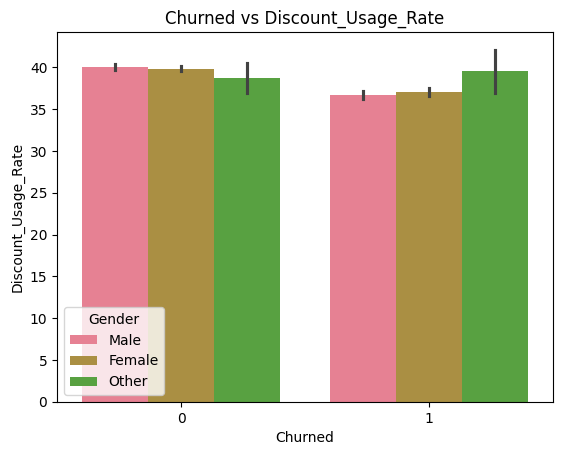

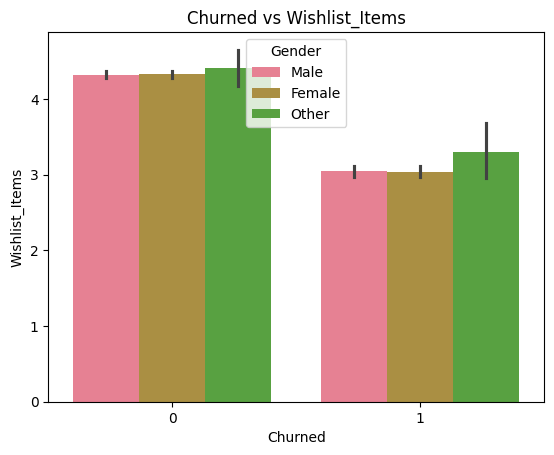

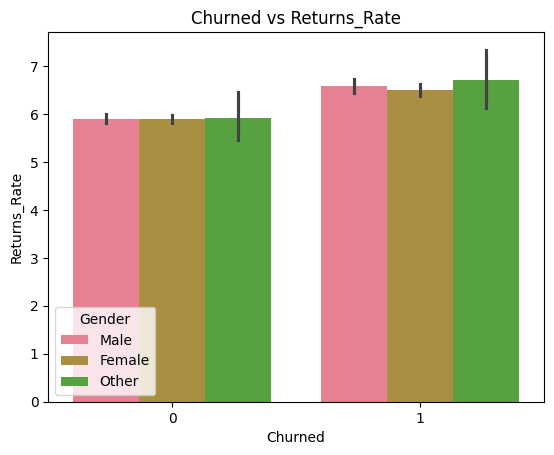

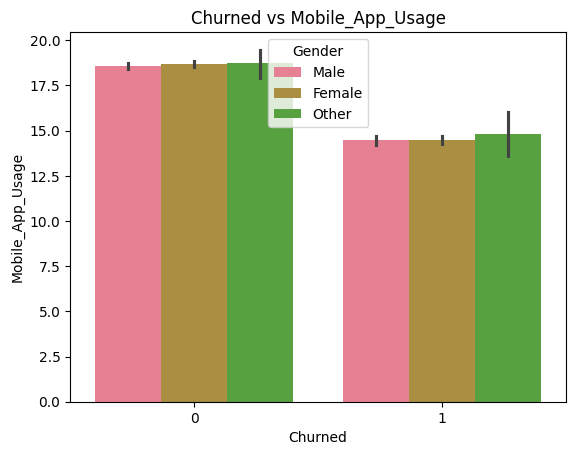

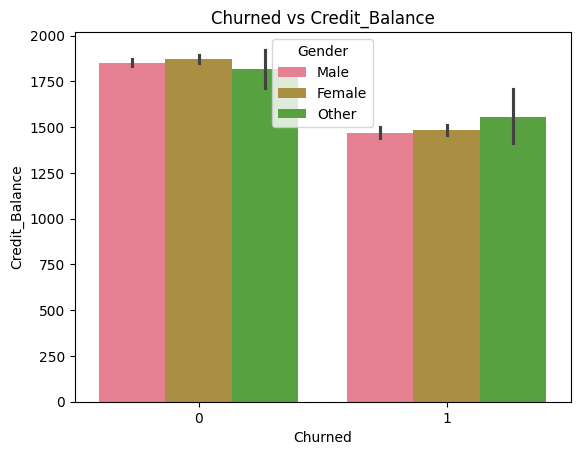

In [ ]:
for selected_column in num_cols:
    sns.barplot(
        x='Churned',
        y=selected_column,
        data=df,
        hue='Gender'
    )
    plt.title(f'Churned vs {selected_column}')
    plt.show()

# Numerica Numerica

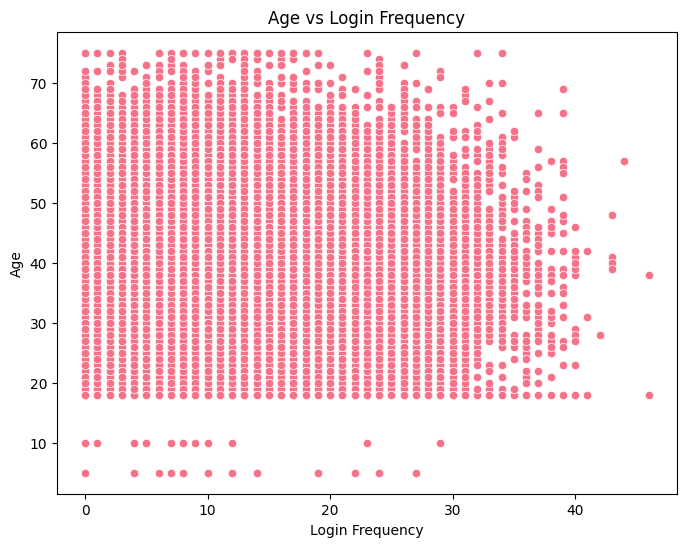

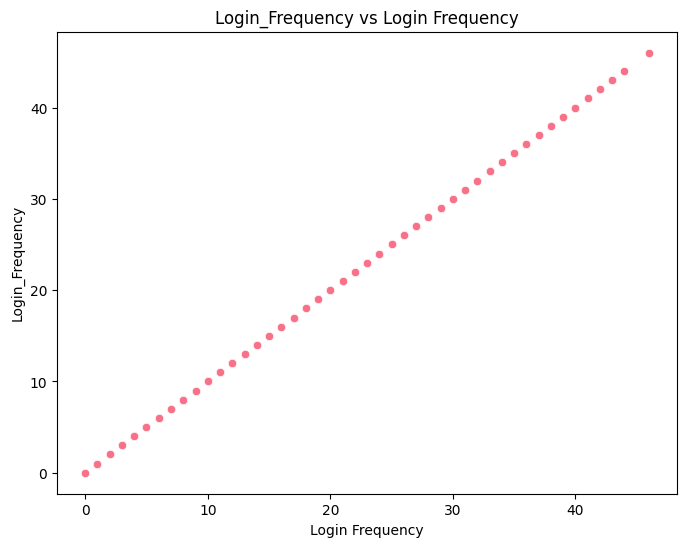

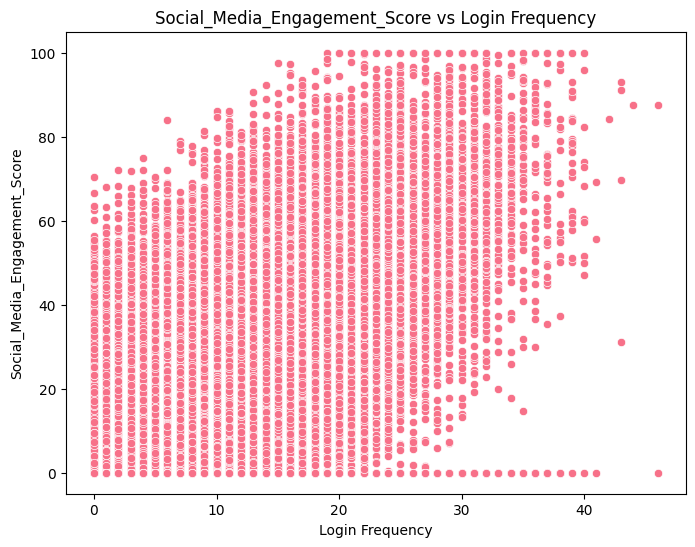

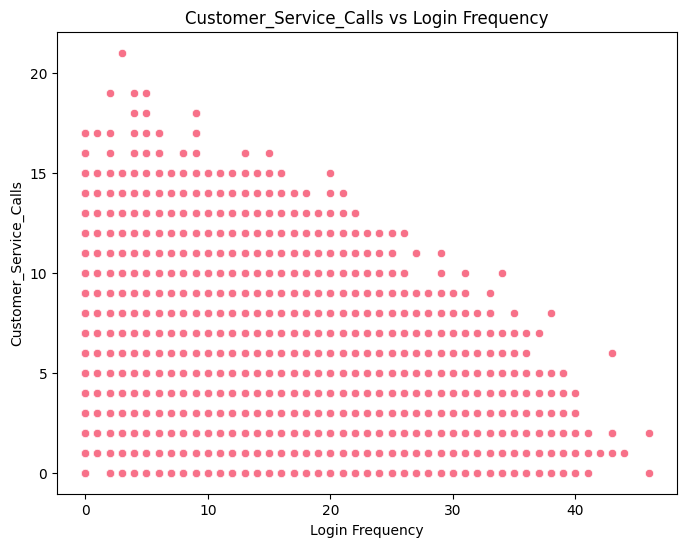

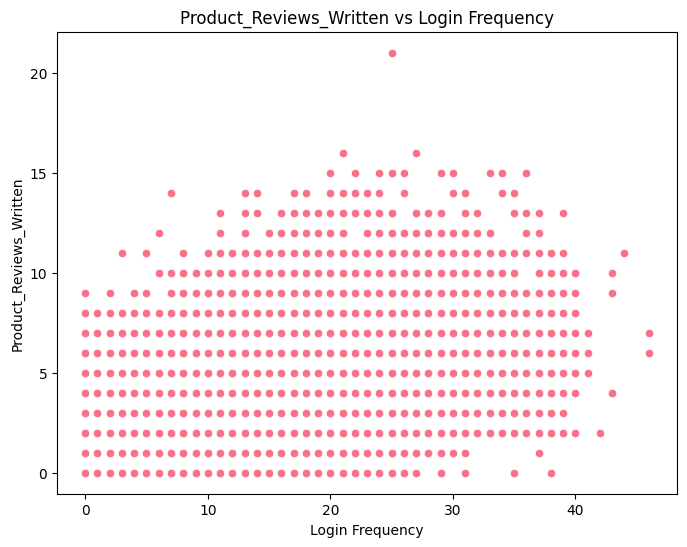

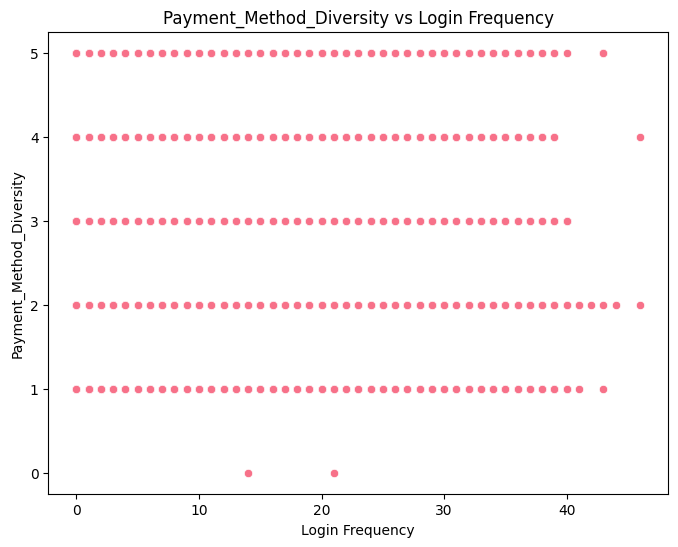

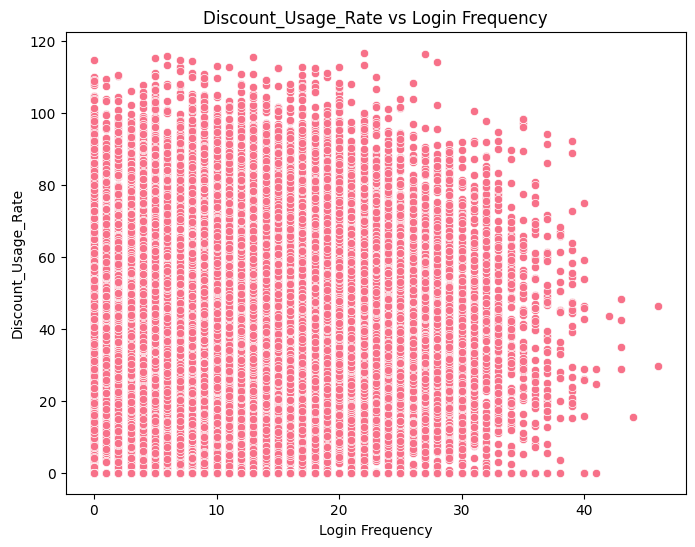

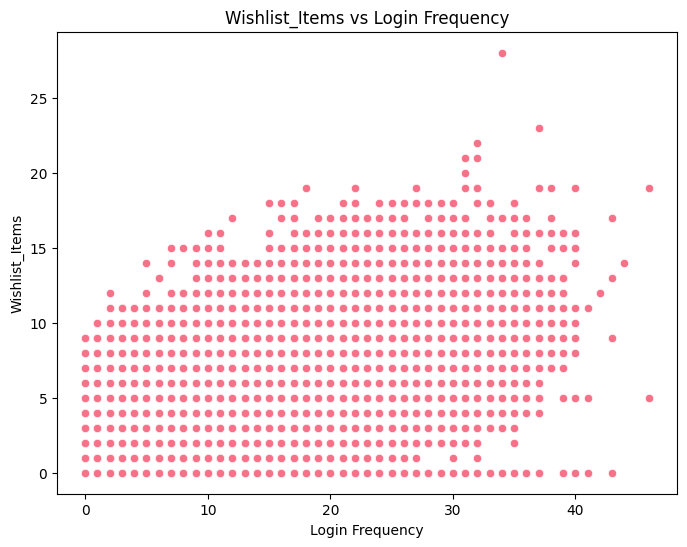

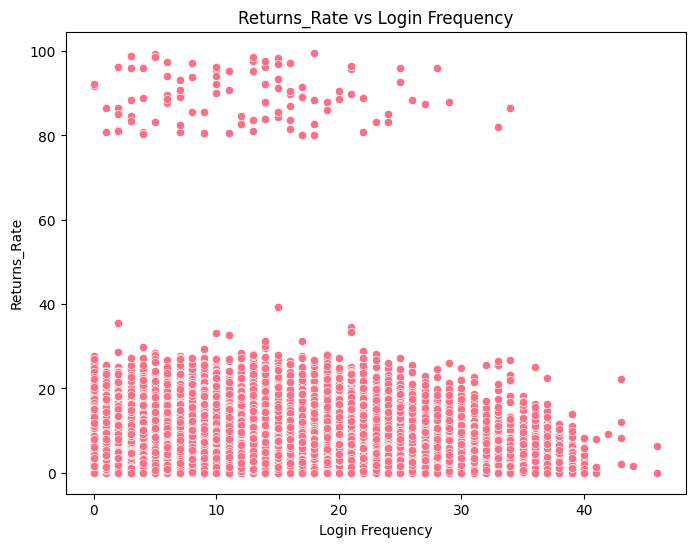

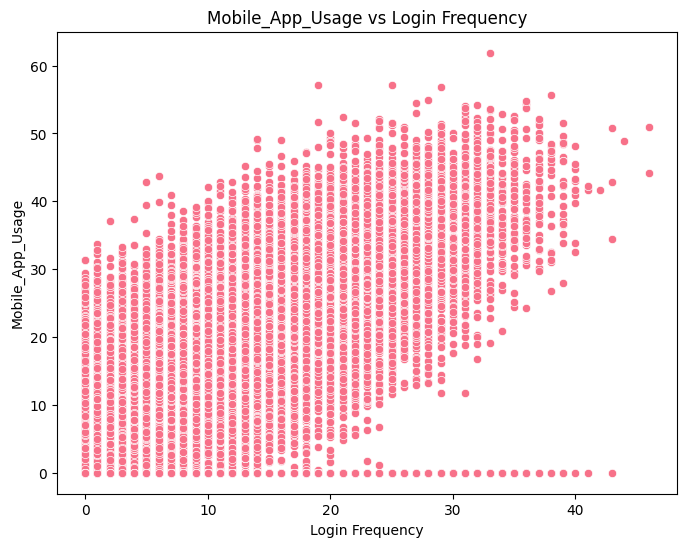

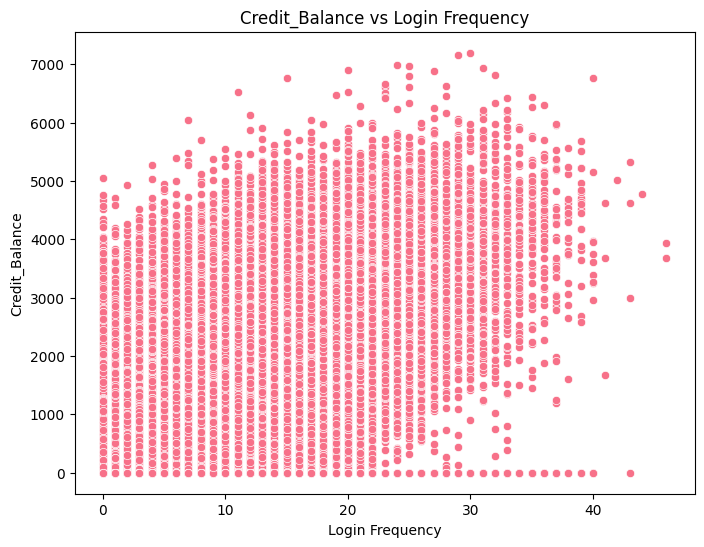

In [76]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Login_Frequency', y=col, data=df)
    plt.title(f'{col} vs Login Frequency')
    plt.xlabel('Login Frequency')
    plt.ylabel(col)
    plt.show()

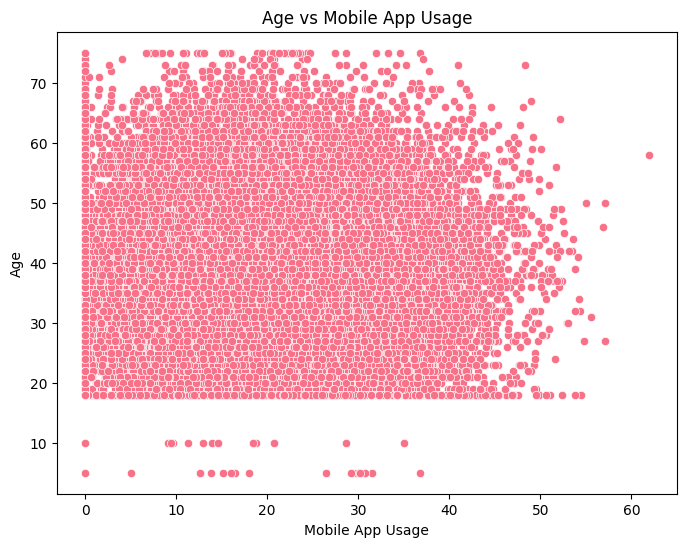

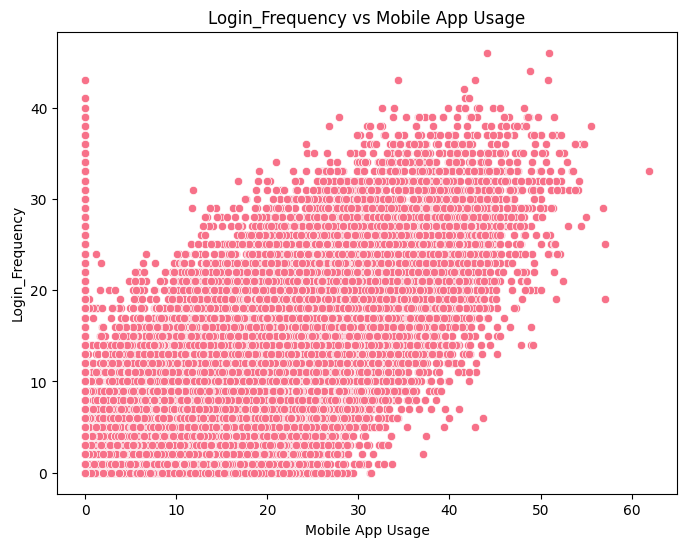

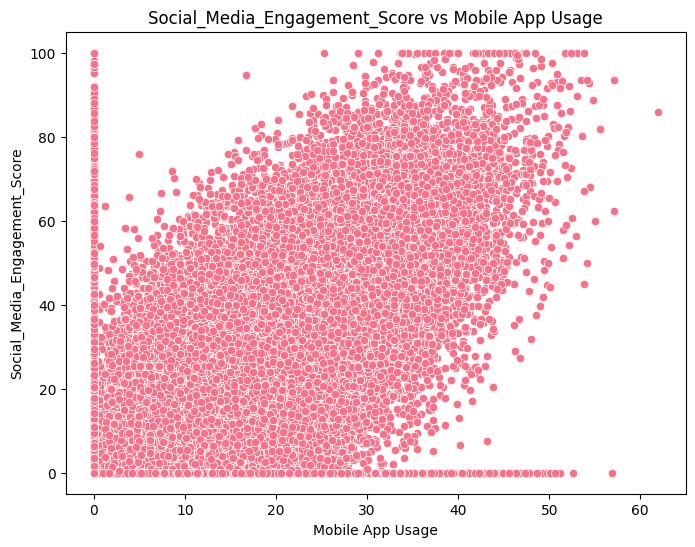

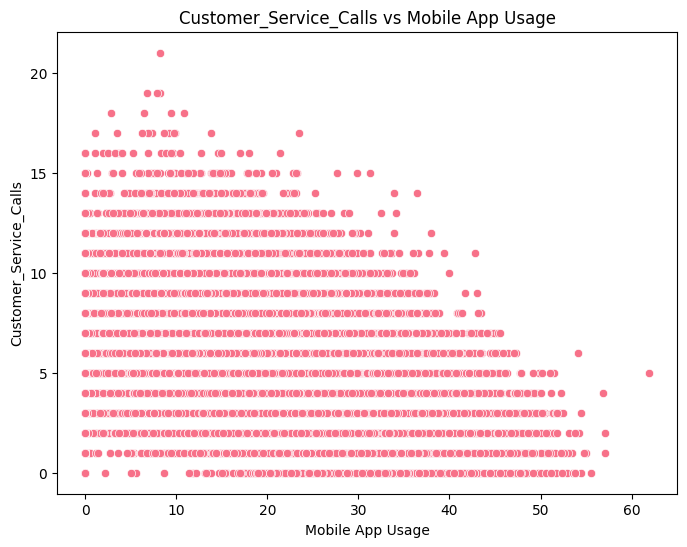

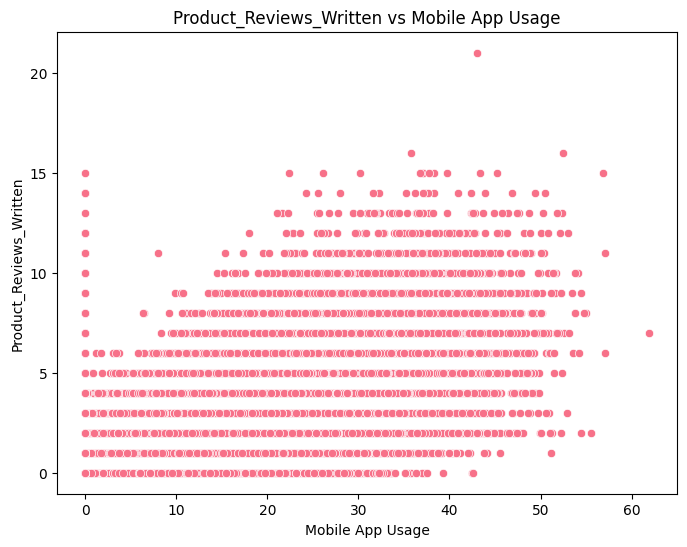

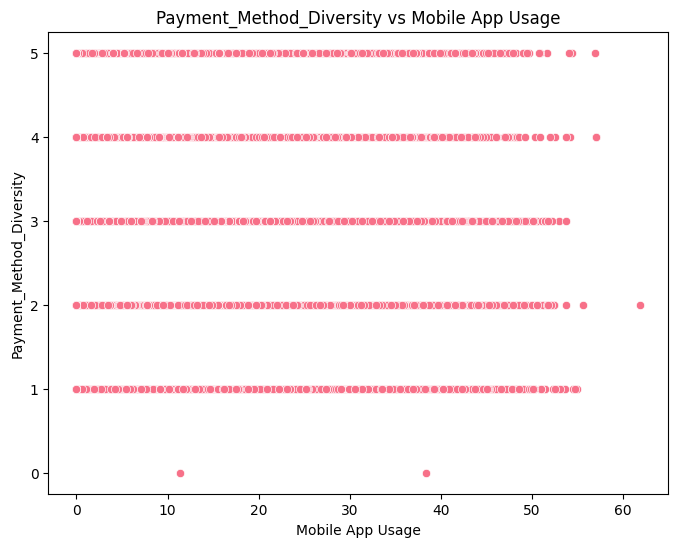

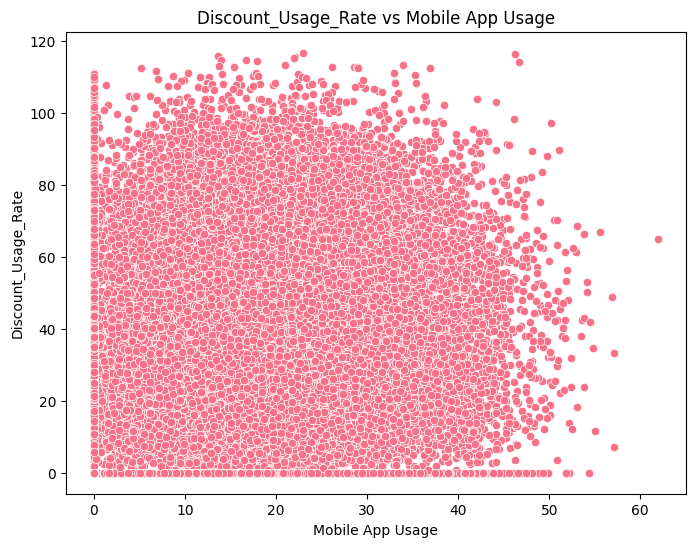

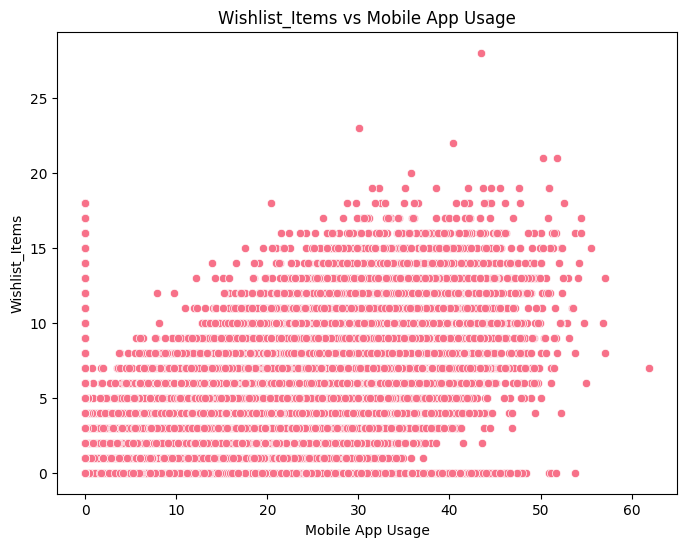

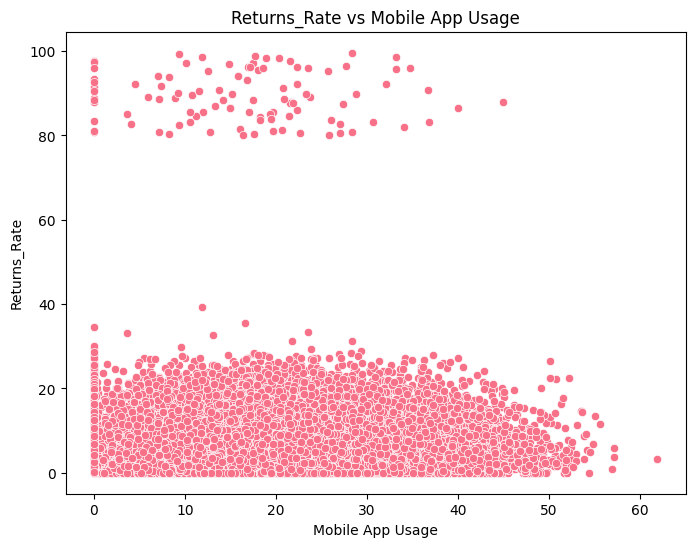

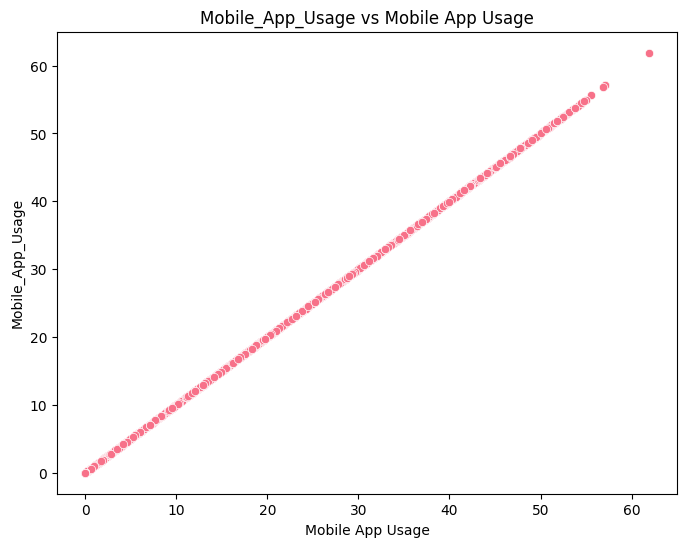

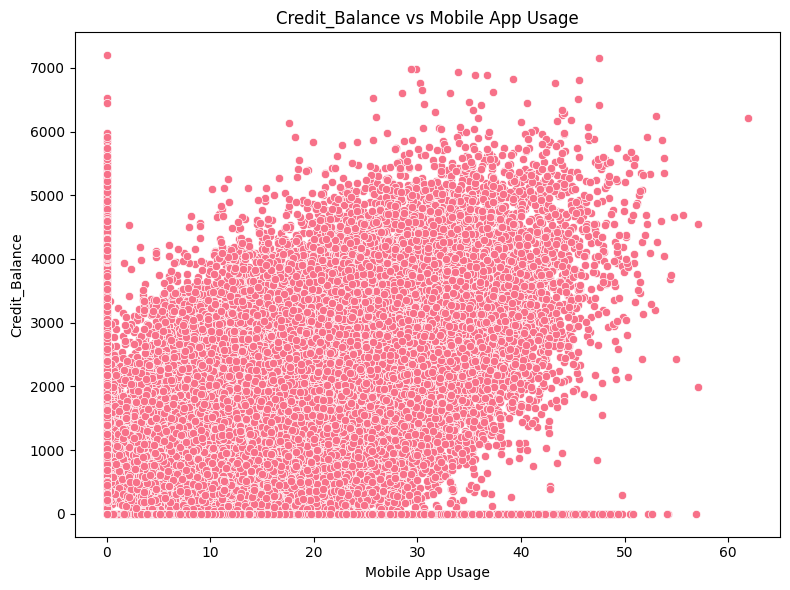

In [77]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Mobile_App_Usage', y=col, data=df)
    plt.title(f'{col} vs Mobile App Usage')
    plt.xlabel('Mobile App Usage')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# EDA univariante

1. BASIC DATA OVERVIEW
Dataset shape: (50000, 25)

Data types:
Age                                int32
Gender                            object
Country                           object
City                              object
Membership_Years                 float64
Login_Frequency                    int32
Session_Duration_Avg             float64
Pages_Per_Session                float64
Cart_Abandonment_Rate            float64
Wishlist_Items                     int32
Total_Purchases                  float64
Average_Order_Value              float64
Days_Since_Last_Purchase           int32
Discount_Usage_Rate              float64
Returns_Rate                     float64
Customer_Service_Calls             int32
Product_Reviews_Written            int32
Social_Media_Engagement_Score    float64
Mobile_App_Usage                 float64
Payment_Method_Diversity           int32
Lifetime_Value                   float64
Credit_Balance                     int32
Churned                            

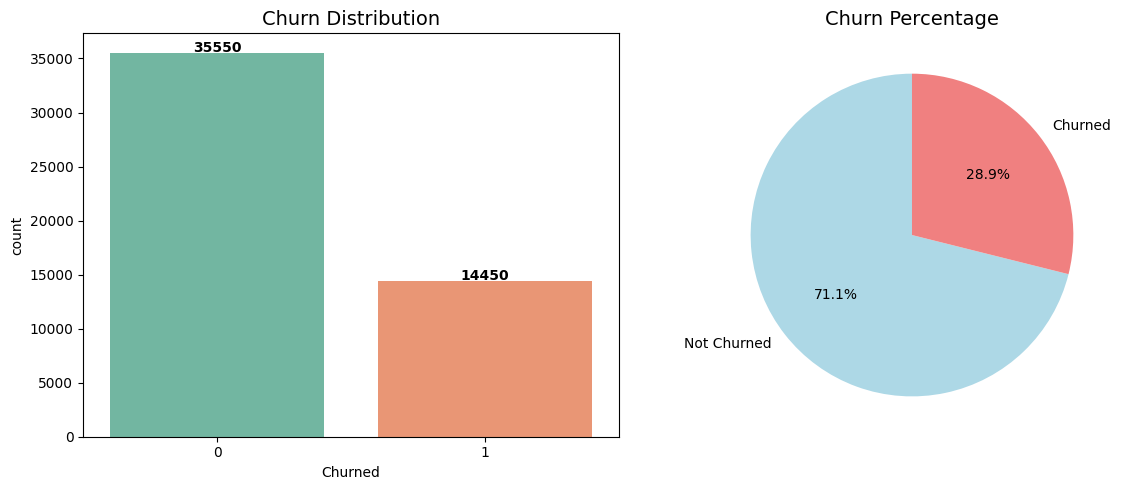


3. NUMERICAL VARIABLES ANALYSIS

Basic Statistics for Numerical Variables:
            Age  Login_Frequency  Social_Media_Engagement_Score  \
count  50000.00         50000.00                       50000.00   
mean      37.73            11.62                          25.84   
std       11.18             7.81                          21.53   
min        5.00             0.00                           0.00   
25%       30.00             6.00                           5.70   
50%       37.00            11.00                          23.70   
75%       45.00            17.00                          40.70   
max       75.00            46.00                         100.00   

       Customer_Service_Calls  Product_Reviews_Written  \
count                50000.00                 50000.00   
mean                     5.68                     2.79   
std                      2.67                     2.26   
min                      0.00                     0.00   
25%                      4.00 

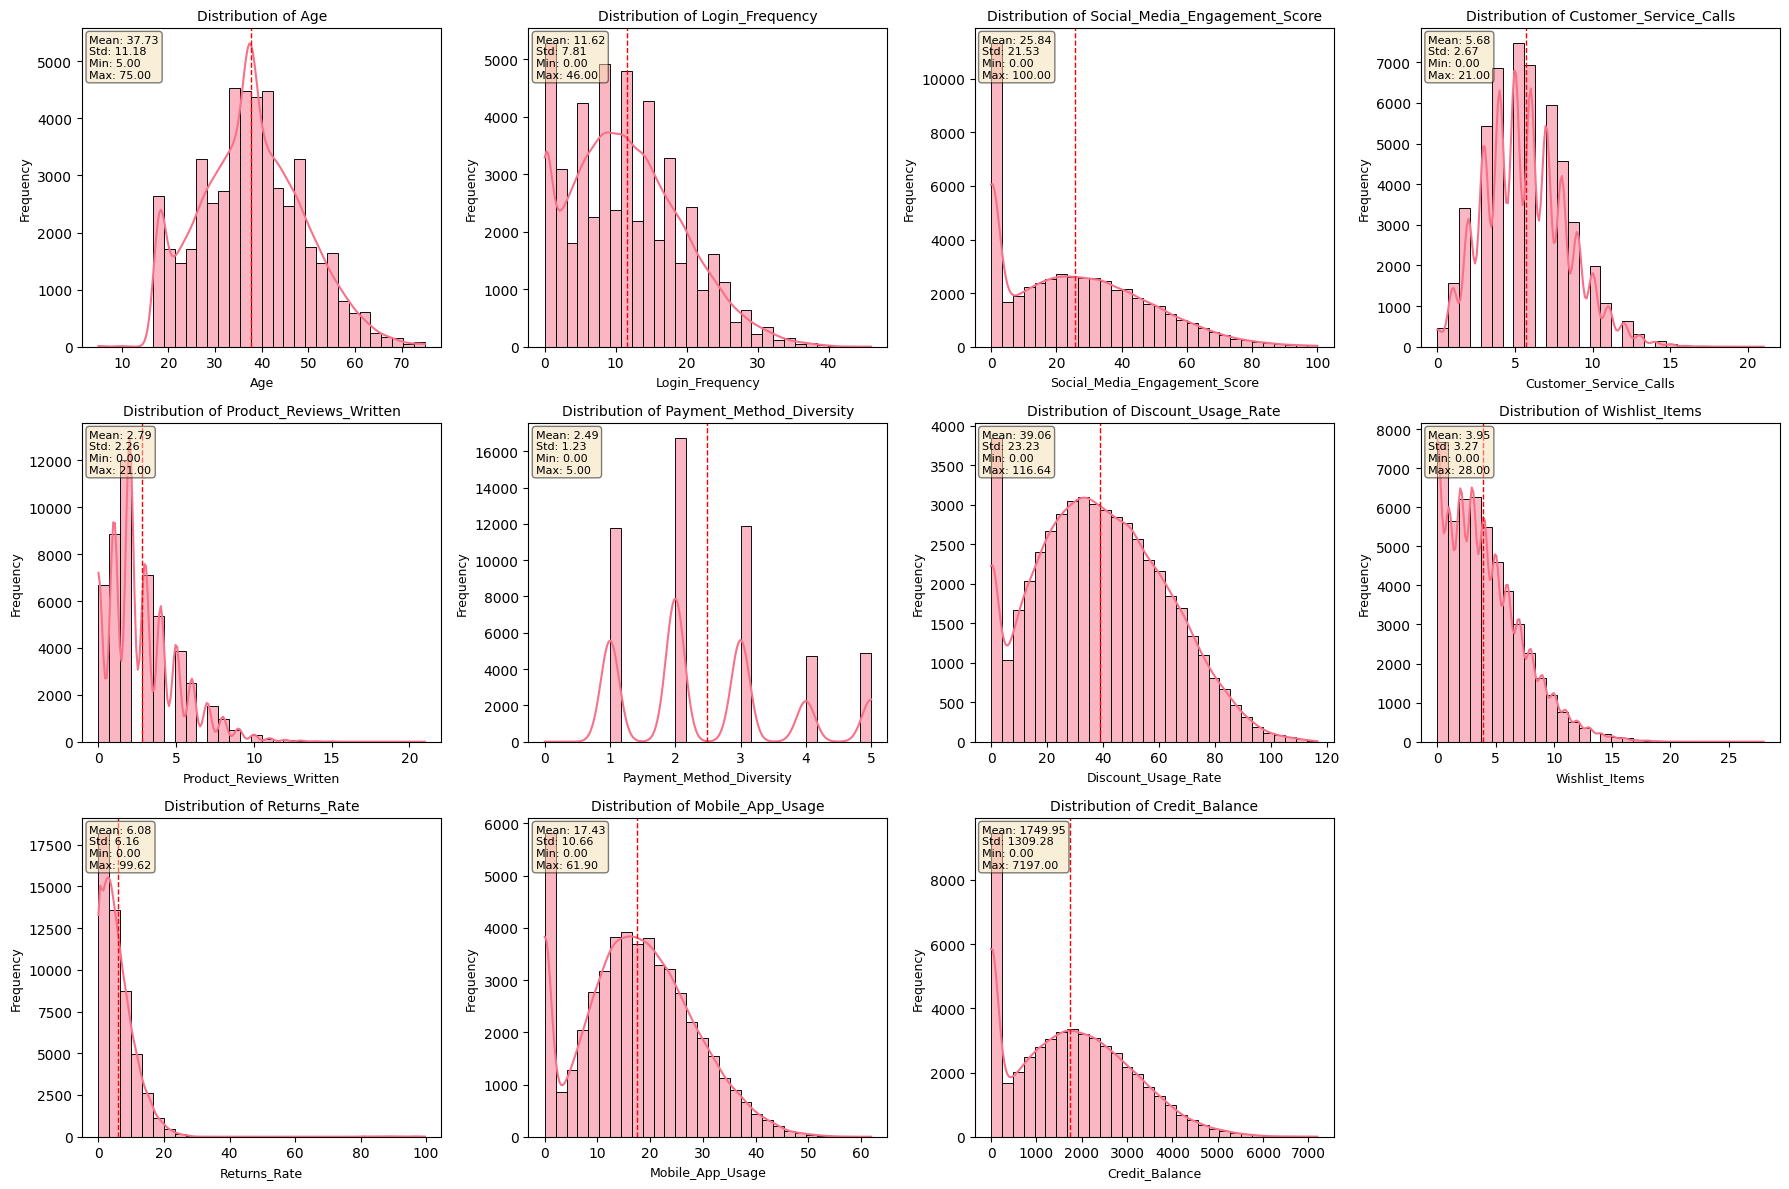


Creating box plots for outlier detection...


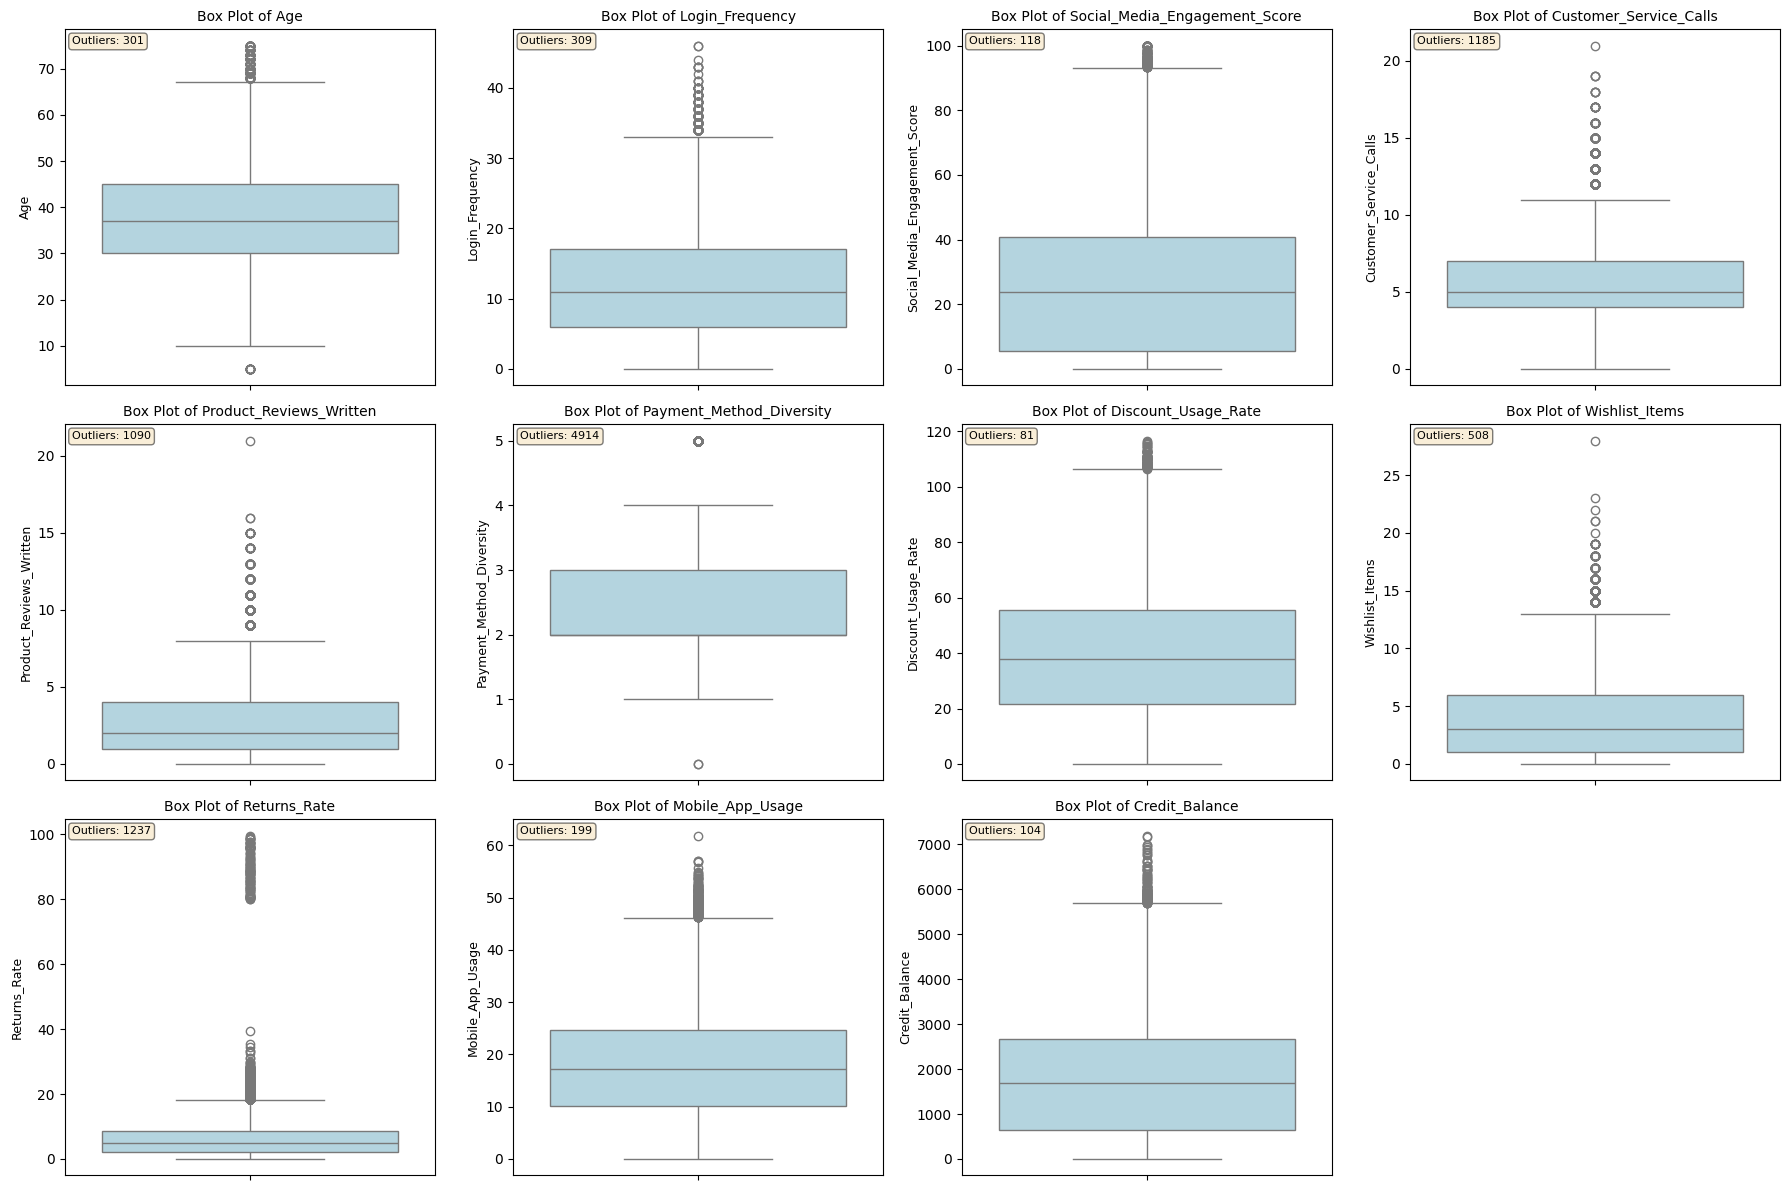


Analyzing numerical variables relationship with churn...

Comparison of means by churn status:
                         Variable  Churned_Mean  Not_Churned_Mean  Difference  \
0                             Age       35.9330           38.4613     -2.5283   
1                 Login_Frequency        9.1208           12.6424     -3.5216   
2   Social_Media_Engagement_Score       20.3048           28.0909     -7.7862   
3          Customer_Service_Calls        6.8965            5.1849      1.7116   
4         Product_Reviews_Written        2.1761            3.0446     -0.8684   
5        Payment_Method_Diversity        2.4878            2.4843      0.0035   
6             Discount_Usage_Rate       36.9143           39.9289     -3.0146   
7                  Wishlist_Items        3.0439            4.3246     -1.2807   
8                    Returns_Rate        6.5352            5.8961      0.6390   
9                Mobile_App_Usage       14.4811           18.6349     -4.1537   
10           

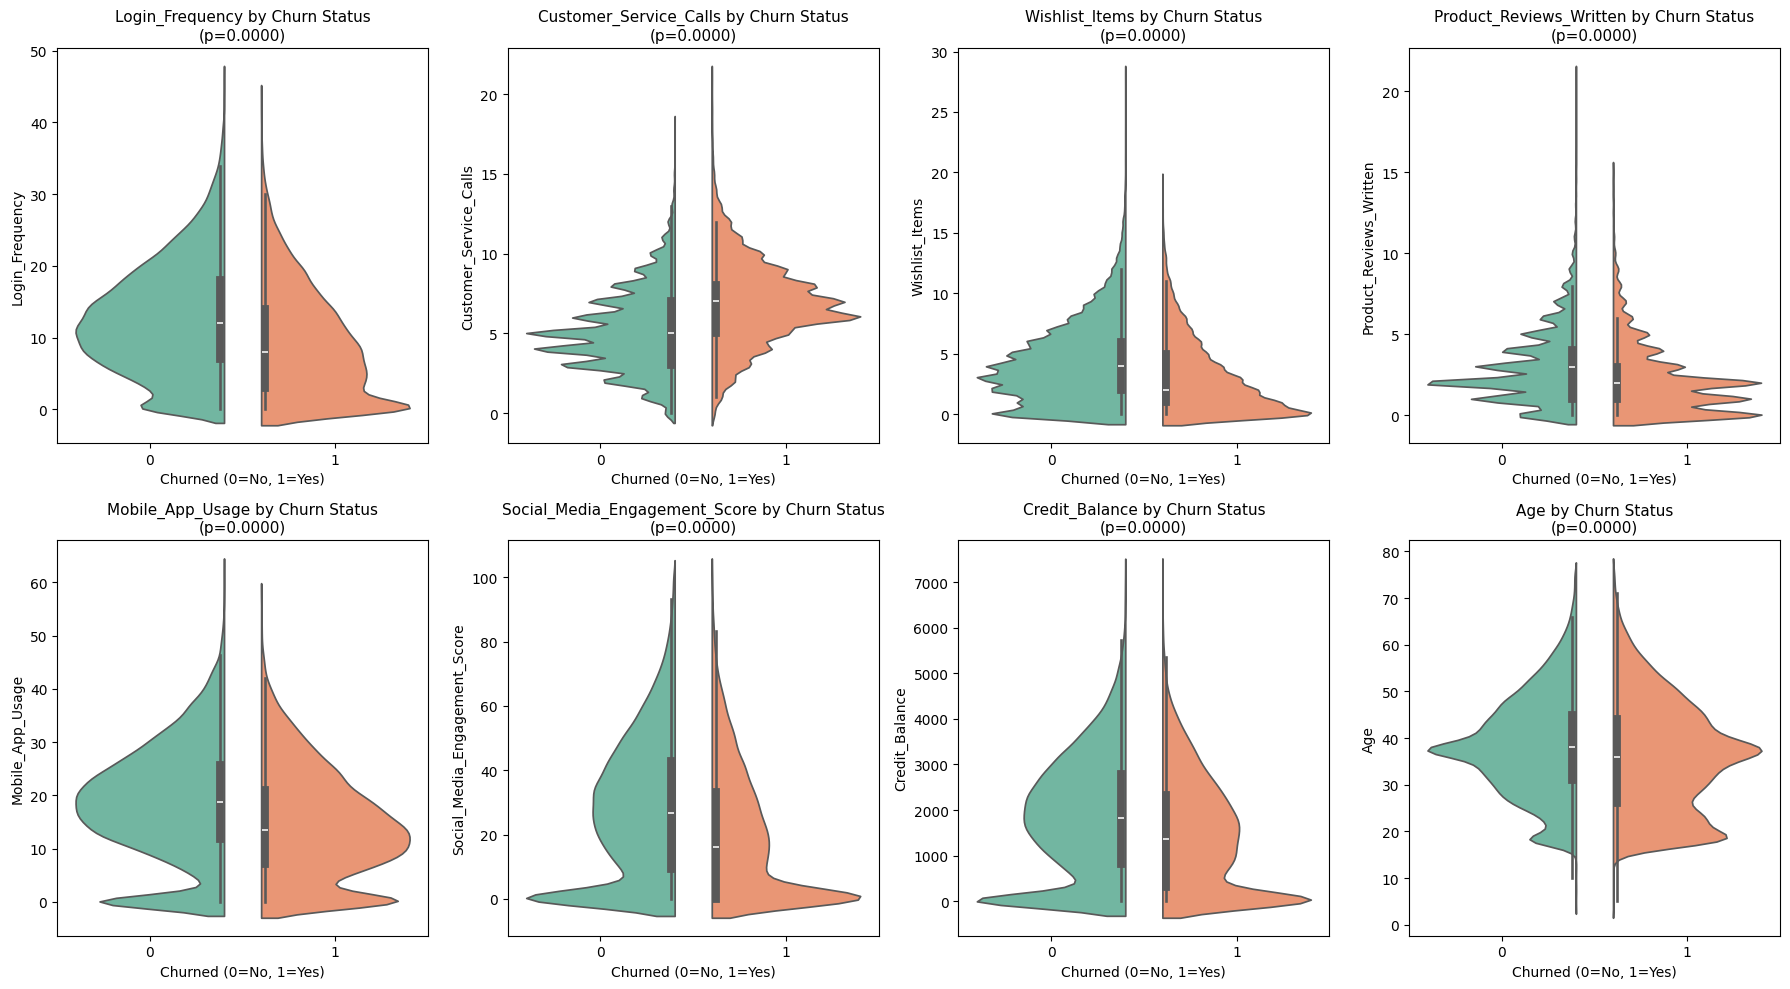


4. CORRELATION ANALYSIS


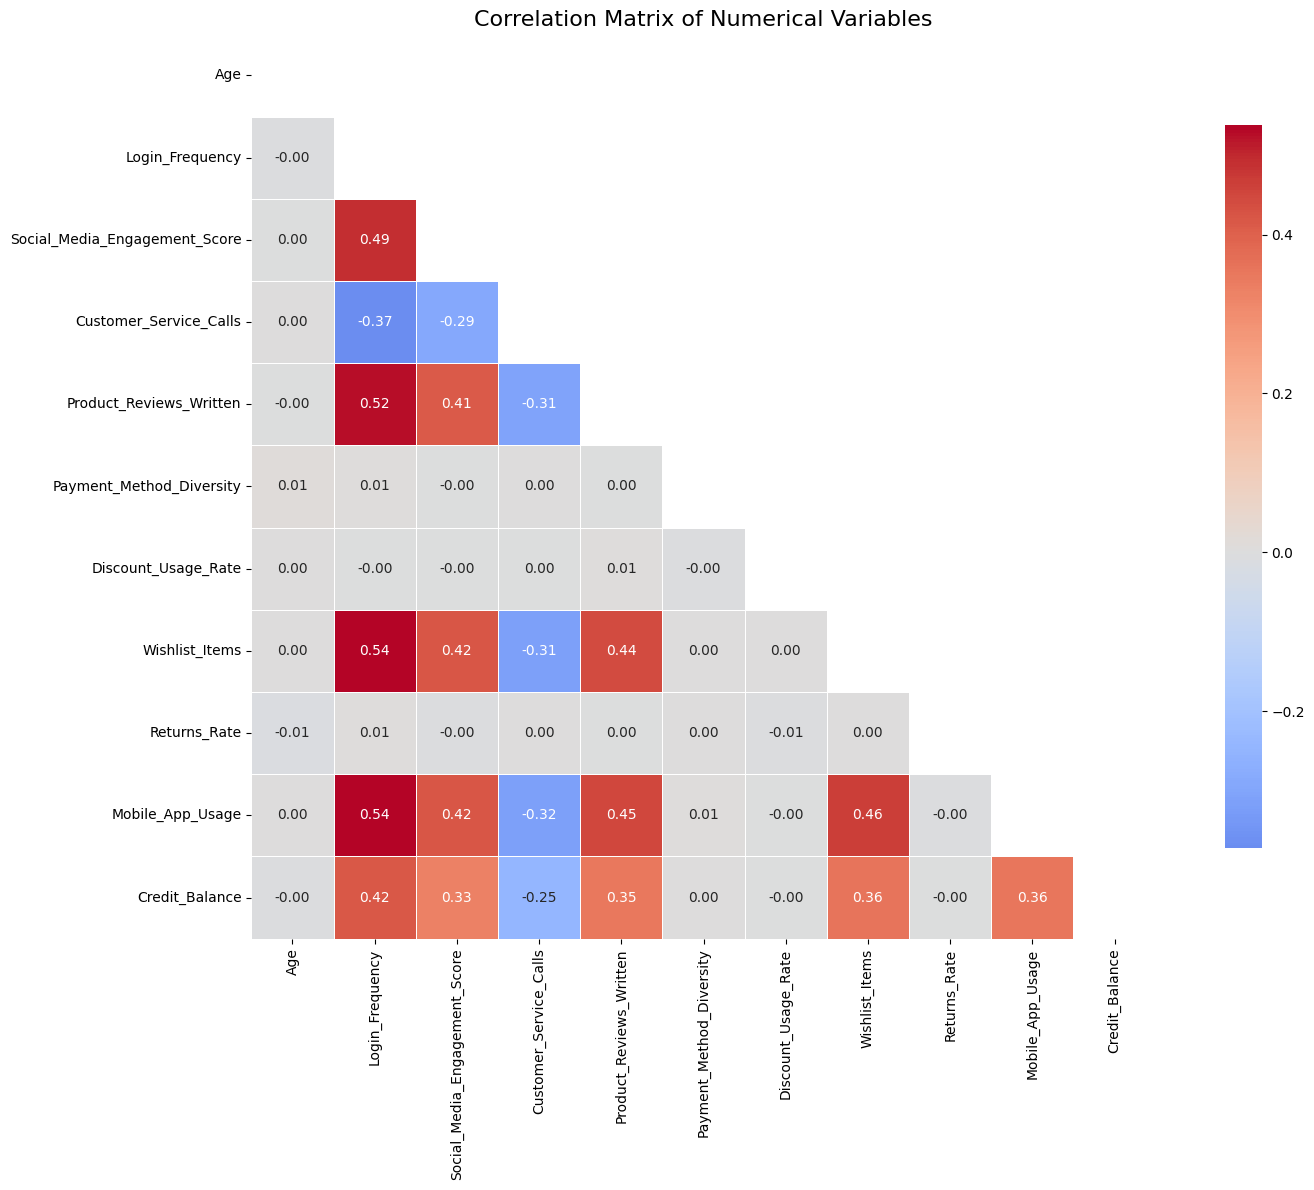


Top positive correlations (≥ 0.5):
Login_Frequency - Product_Reviews_Written: 0.524
Login_Frequency - Wishlist_Items: 0.538
Login_Frequency - Mobile_App_Usage: 0.537

Top negative correlations (≤ -0.3):
Login_Frequency - Customer_Service_Calls: -0.373
Customer_Service_Calls - Product_Reviews_Written: -0.306
Customer_Service_Calls - Wishlist_Items: -0.313
Customer_Service_Calls - Mobile_App_Usage: -0.318

5. CATEGORICAL VARIABLES ANALYSIS

Gender distribution:
Gender
Female    25116
Male      23947
Other       937
Name: count, dtype: int64
Unique values: 3

Country distribution:
Country
USA          17384
UK            7534
Canada        6023
Germany       4925
Australia     4061
France        4013
India         3512
Japan         2548
Name: count, dtype: int64
Unique values: 8

City distribution:
City
Houston        3549
Phoenix        3490
New York       3477
Chicago        3475
Los Angeles    3393
Manchester     1576
Birmingham     1535
Leeds          1529
London         1458
Glasgo

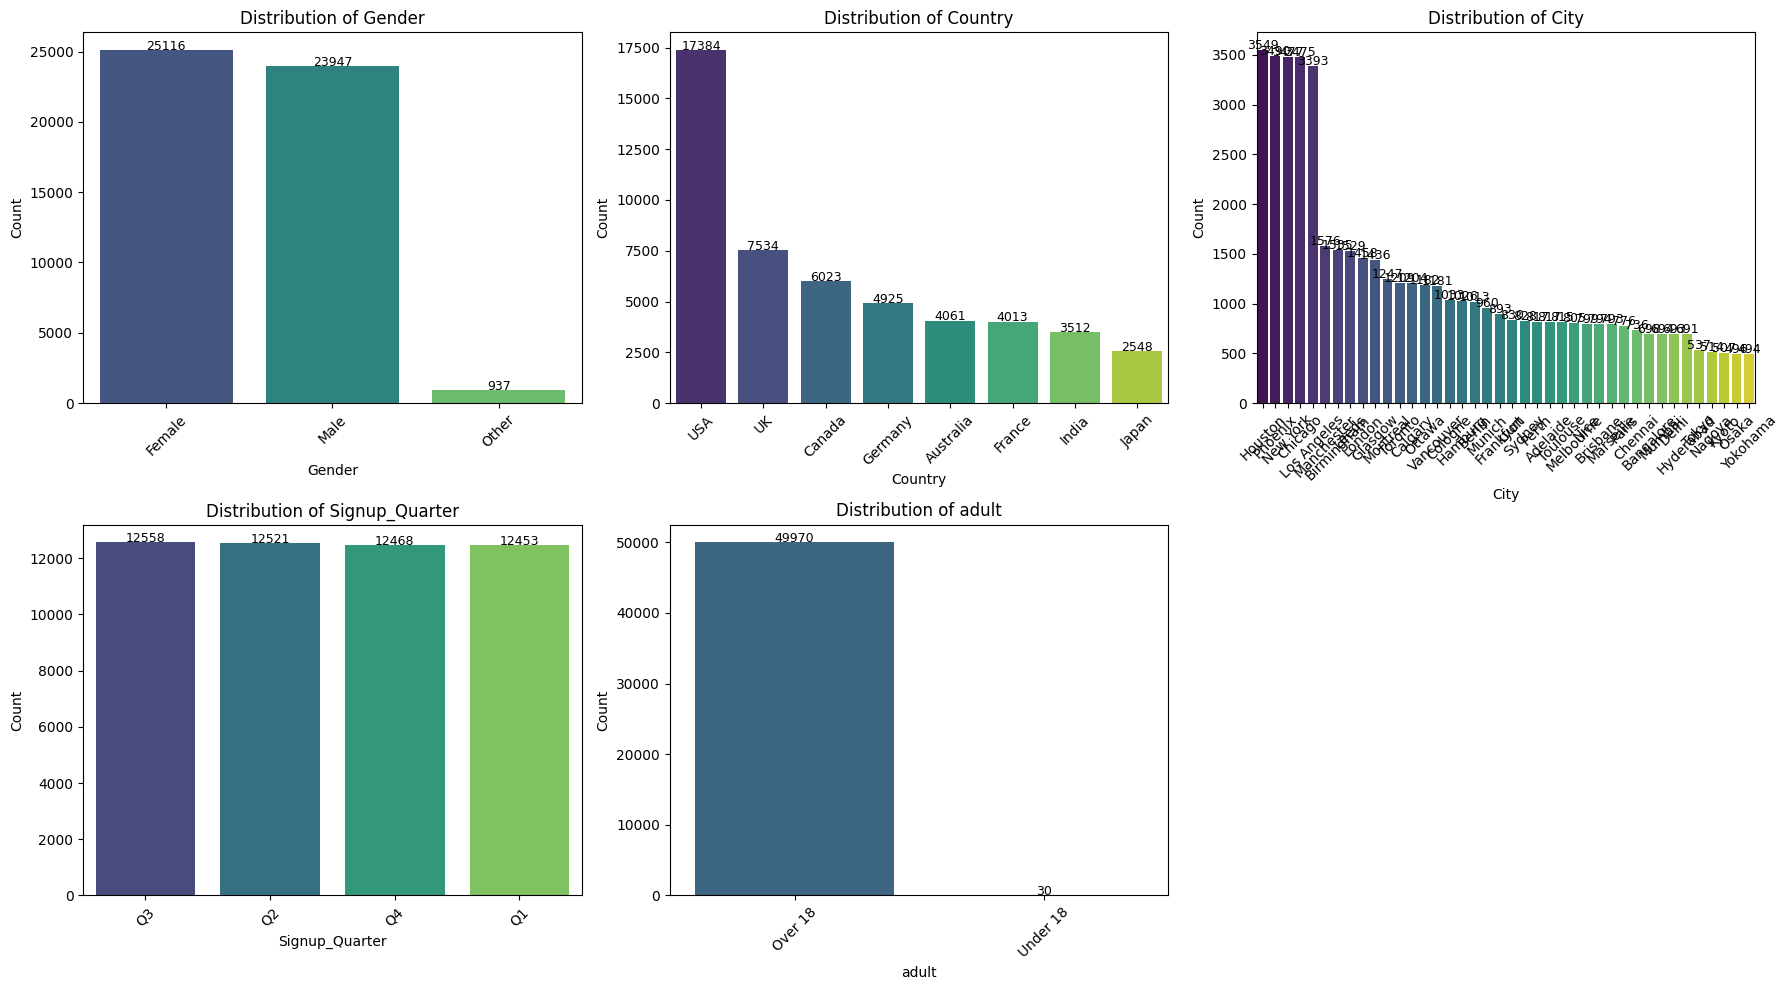


Analyzing categorical variables relationship with churn...


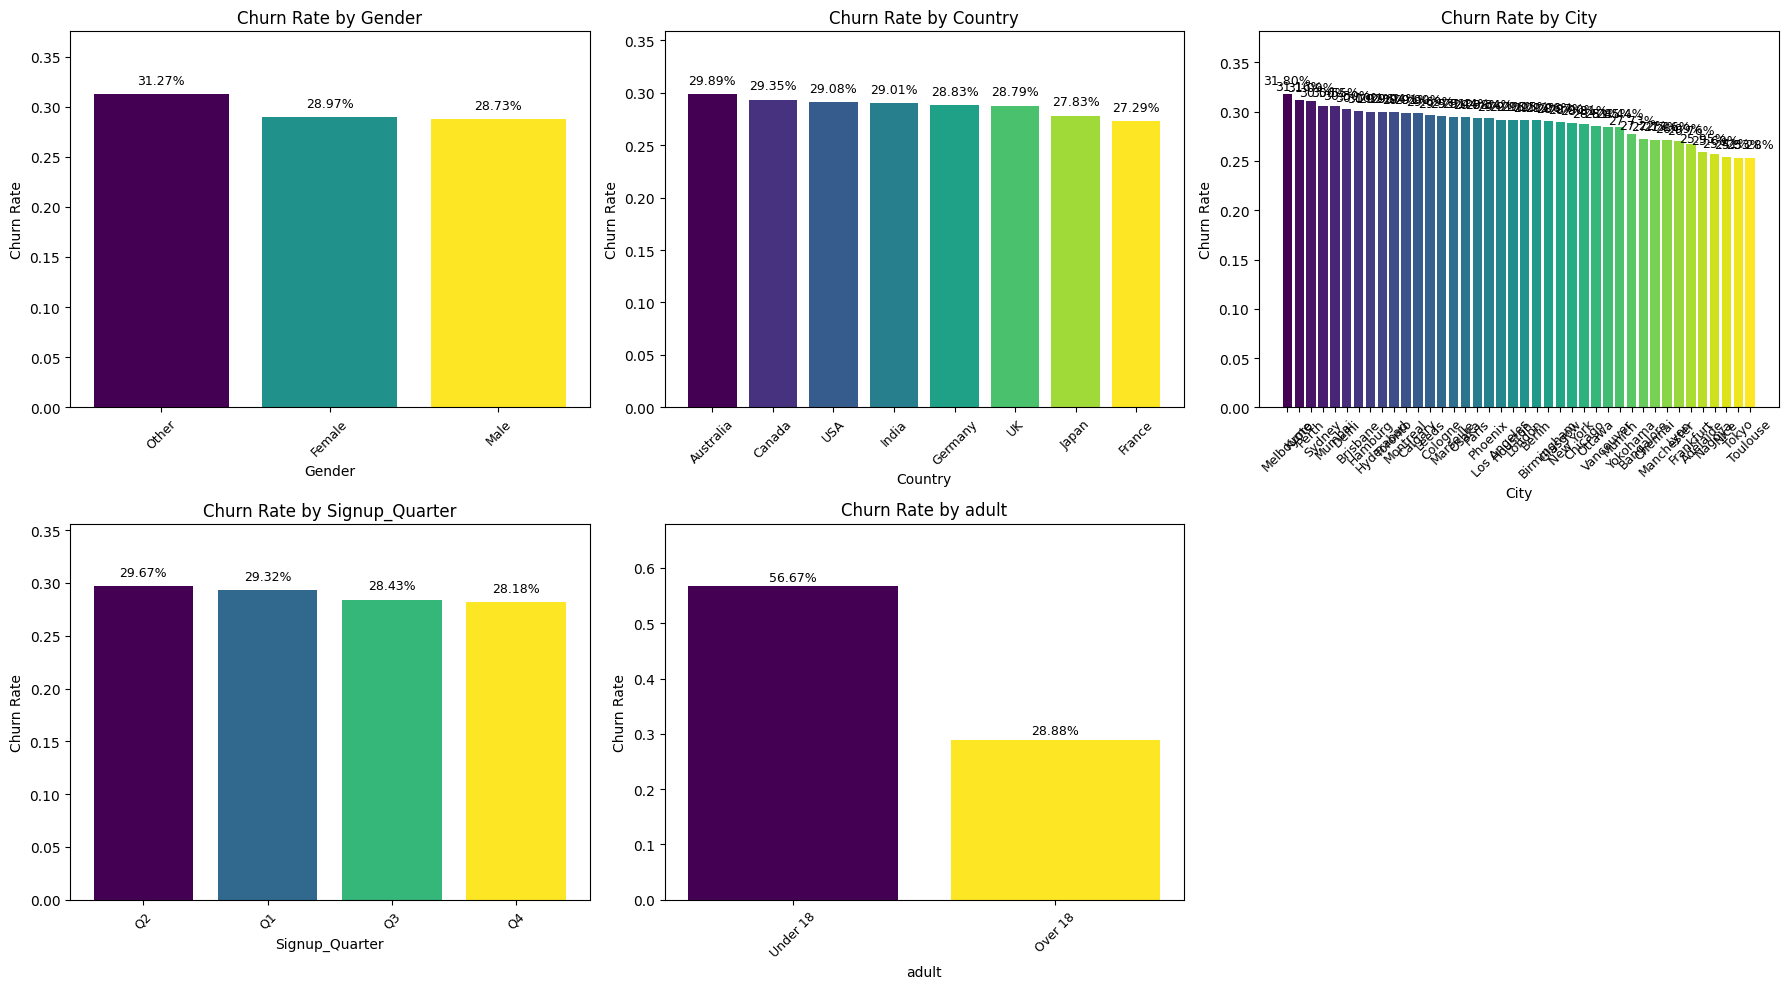


Churn rates by category:

Gender:
          mean  count
Gender               
Female  28.97%  25116
Male    28.73%  23947
Other   31.27%    937

Country:
             mean  count
Country                 
Australia  29.89%   4061
Canada     29.35%   6023
France     27.29%   4013
Germany    28.83%   4925
India      29.01%   3512
Japan      27.83%   2548
UK         28.79%   7534
USA        29.08%  17384

City:
               mean  count
City                      
Adelaide     25.95%    817
Bangalore    27.22%    698
Berlin       29.12%   1013
Birmingham   29.06%   1535
Brisbane     30.10%    794
Calgary      29.90%   1204
Chennai      27.17%    736
Chicago      28.81%   3475
Cologne      29.53%   1033
Delhi        30.30%    693
Frankfurt    26.76%    893
Glasgow      28.97%   1436
Hamburg      30.02%   1026
Houston      29.16%   3549
Hyderabad    29.96%    691
Kyoto        31.16%    507
Leeds        29.69%   1529
London       29.15%   1458
Los Angeles  29.21%   3393
Lyon         26.99%  

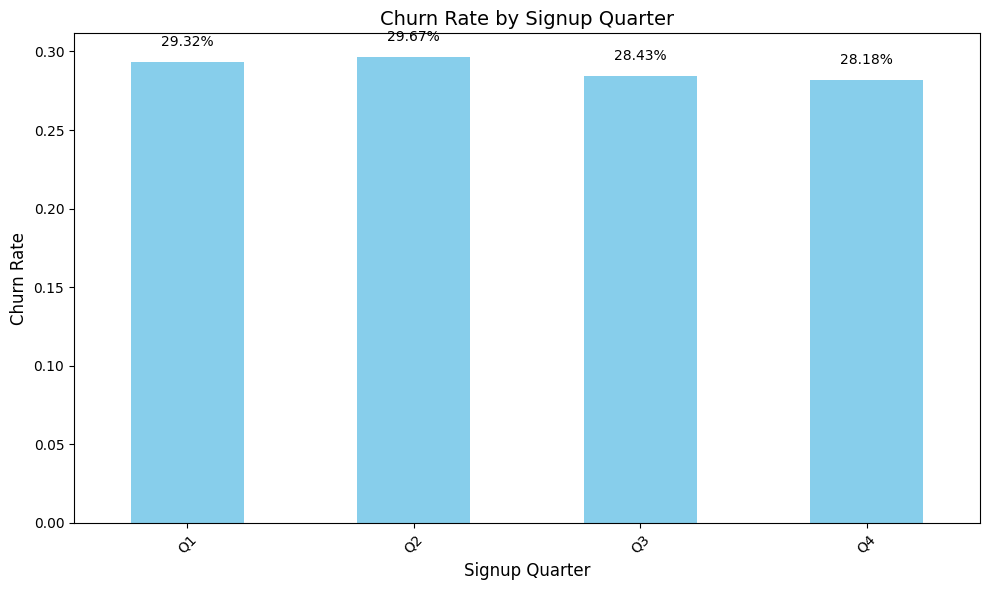


7. KEY INTERACTION ANALYSES


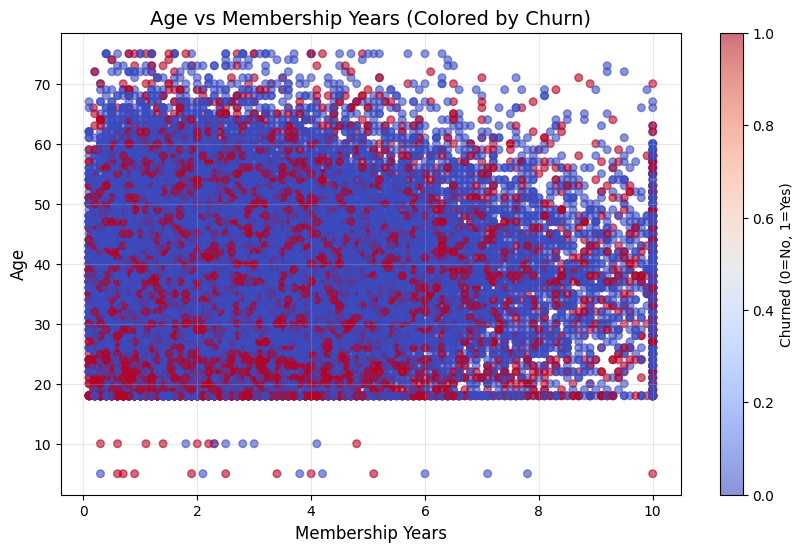

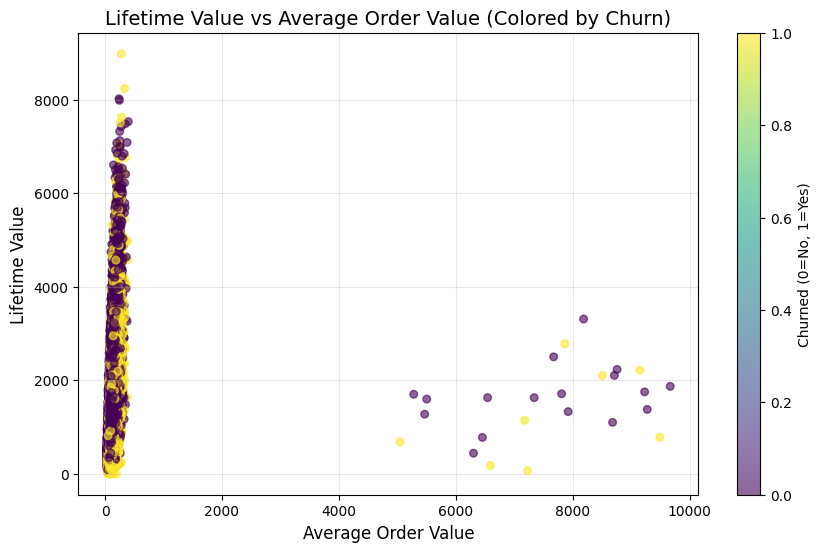


8. SUMMARY STATISTICS & RECOMMENDATIONS

Detailed Summary of Numerical Variables:
                         Variable      Mean       Std  Min       Max  \
0                             Age    37.731    11.183  5.0    75.000   
1                 Login_Frequency    11.625     7.811  0.0    46.000   
2   Social_Media_Engagement_Score    25.841    21.530  0.0   100.000   
3          Customer_Service_Calls     5.680     2.672  0.0    21.000   
4         Product_Reviews_Written     2.794     2.256  0.0    21.000   
5        Payment_Method_Diversity     2.485     1.225  0.0     5.000   
6             Discount_Usage_Rate    39.058    23.231  0.0   116.640   
7                  Wishlist_Items     3.955     3.274  0.0    28.000   
8                    Returns_Rate     6.081     6.164  0.0    99.616   
9                Mobile_App_Usage    17.434    10.659  0.0    61.900   
10                 Credit_Balance  1749.948  1309.277  0.0  7197.000   

    Skewness  Missing  Zero_Count  
0      0.232    

In [78]:
# Set style
sns.set_palette("husl")

# 1. BASIC DATA OVERVIEW
print("="*60)
print("1. BASIC DATA OVERVIEW")
print("="*60)

print(f"Dataset shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Categorical columns
Cat_cols = ['Gender', 'Country', 'City', 'Signup_Quarter', 'adult']

# 2. TARGET VARIABLE ANALYSIS
print("\n" + "="*60)
print("2. TARGET VARIABLE ANALYSIS (Churned)")
print("="*60)

churn_distribution = df['Churned'].value_counts()
print(f"Churn distribution:\n{churn_distribution}")
print(f"\nChurn rate: {(df['Churned'].mean()*100):.2f}%")

# Plot churn distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
sns.countplot(data=df, x='Churned', ax=axes[0], palette='Set2')
axes[0].set_title('Churn Distribution', fontsize=14)
for i, v in enumerate(churn_distribution.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(churn_distribution.values, labels=['Not Churned', 'Churned'], 
           autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
axes[1].set_title('Churn Percentage', fontsize=14)

plt.tight_layout()
plt.show()

# 3. NUMERICAL VARIABLES ANALYSIS
print("\n" + "="*60)
print("3. NUMERICAL VARIABLES ANALYSIS")
print("="*60)

# Basic statistics
print("\nBasic Statistics for Numerical Variables:")
print(df[num_cols].describe().round(2))

# Check for zeros and negatives
print("\nChecking for zeros/negatives in numerical columns:")
for col in num_cols:
    zeros = (df[col] == 0).sum()
    negatives = (df[col] < 0).sum() if df[col].dtype in ['int64', 'float64'] else 0
    if zeros > 0 or negatives > 0:
        print(f"{col}: Zeros={zeros}, Negatives={negatives}")

# 3.1 Distribution Plots
print("\nCreating distribution plots for numerical variables...")

# Create subplots for distributions
n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    if idx < len(axes):
        # Histogram with KDE
        sns.histplot(data=df, x=col, kde=True, ax=axes[idx], bins=30)
        axes[idx].set_title(f'Distribution of {col}', fontsize=10)
        axes[idx].set_xlabel(col, fontsize=9)
        axes[idx].set_ylabel('Frequency', fontsize=9)
        
        # Add vertical line for mean
        mean_val = df[col].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.2f}')
        
        # Add text box with statistics
        stats_text = f'Mean: {mean_val:.2f}\nStd: {df[col].std():.2f}\nMin: {df[col].min():.2f}\nMax: {df[col].max():.2f}'
        axes[idx].text(0.02, 0.98, stats_text, transform=axes[idx].transAxes, 
                      fontsize=8, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide empty subplots
for idx in range(len(num_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# 3.2 Box Plots to Identify Outliers
print("\nCreating box plots for outlier detection...")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    if idx < len(axes):
        sns.boxplot(data=df, y=col, ax=axes[idx], color='lightblue')
        axes[idx].set_title(f'Box Plot of {col}', fontsize=10)
        axes[idx].set_ylabel(col, fontsize=9)
        
        # Calculate and display outlier count
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        axes[idx].text(0.02, 0.98, f'Outliers: {outliers}', transform=axes[idx].transAxes, 
                      fontsize=8, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide empty subplots
for idx in range(len(num_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# 3.3 Numerical Variables vs Churn
print("\nAnalyzing numerical variables relationship with churn...")

# Create comparison statistics
churn_stats = []
for col in num_cols:
    churned_mean = df[df['Churned'] == 1][col].mean()
    not_churned_mean = df[df['Churned'] == 0][col].mean()
    diff = churned_mean - not_churned_mean
    p_value = stats.ttest_ind(df[df['Churned'] == 1][col].dropna(),
                              df[df['Churned'] == 0][col].dropna()).pvalue
    churn_stats.append({
        'Variable': col,
        'Churned_Mean': churned_mean,
        'Not_Churned_Mean': not_churned_mean,
        'Difference': diff,
        'P_Value': p_value,
        'Significant': p_value < 0.05
    })

churn_stats_df = pd.DataFrame(churn_stats)
print("\nComparison of means by churn status:")
print(churn_stats_df.round(4))

# Plot top 8 most significant variables
significant_vars = churn_stats_df.sort_values('P_Value').head(8)['Variable'].tolist()

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(significant_vars[:8]):
    # Create violin plot
    sns.violinplot(data=df, x='Churned', y=col, ax=axes[idx], palette='Set2', split=True)
    axes[idx].set_title(f'{col} by Churn Status\n(p={churn_stats_df[churn_stats_df["Variable"]==col]["P_Value"].values[0]:.4f})', 
                       fontsize=11)
    axes[idx].set_xlabel('Churned (0=No, 1=Yes)', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

# 4. CORRELATION ANALYSIS
print("\n" + "="*60)
print("4. CORRELATION ANALYSIS")
print("="*60)

# Calculate correlation matrix
correlation_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Find high correlations
print("\nTop positive correlations (≥ 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] >= 0.5:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

print("\nTop negative correlations (≤ -0.3):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] <= -0.3:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

# 5. CATEGORICAL VARIABLES ANALYSIS
print("\n" + "="*60)
print("5. CATEGORICAL VARIABLES ANALYSIS")
print("="*60)

# Distribution of categorical variables
for col in Cat_cols:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

# Plot categorical distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(Cat_cols):
    # Count plot
    counts = df[col].value_counts()
    sns.countplot(data=df, x=col, ax=axes[idx], order=counts.index, palette='viridis')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add count labels
    for i, v in enumerate(counts.values):
        axes[idx].text(i, v + 10, str(v), ha='center', fontsize=9)

# Hide empty subplot
if len(Cat_cols) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# 5.1 Categorical Variables vs Churn
print("\nAnalyzing categorical variables relationship with churn...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(Cat_cols):
    # Calculate churn rate by category
    churn_rate_by_category = df.groupby(col)['Churned'].mean().sort_values(ascending=False)
    
    # Bar plot
    bars = axes[idx].bar(range(len(churn_rate_by_category)), churn_rate_by_category.values, 
                        color=plt.cm.viridis(np.linspace(0, 1, len(churn_rate_by_category))))
    axes[idx].set_title(f'Churn Rate by {col}', fontsize=12)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Churn Rate', fontsize=10)
    axes[idx].set_xticks(range(len(churn_rate_by_category)))
    axes[idx].set_xticklabels(churn_rate_by_category.index, rotation=45, fontsize=9)
    axes[idx].set_ylim([0, max(churn_rate_by_category.values) * 1.2])
    
    # Add value labels
    for i, v in enumerate(churn_rate_by_category.values):
        axes[idx].text(i, v + 0.01, f'{v:.2%}', ha='center', fontsize=9)

# Hide empty subplot
if len(Cat_cols) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# Print churn rate statistics for categorical variables
print("\nChurn rates by category:")
for col in Cat_cols:
    print(f"\n{col}:")
    churn_rates = df.groupby(col)['Churned'].agg(['mean', 'count'])
    churn_rates['mean'] = churn_rates['mean'].apply(lambda x: f"{x:.2%}")
    print(churn_rates)

# 6. TIME-RELATED ANALYSIS
print("\n" + "="*60)
print("6. TIME-RELATED ANALYSIS")
print("="*60)

# Check Signup_Quarter if it's time-based
if 'Signup_Quarter' in df.columns:
    print("\nChurn rate by Signup Quarter:")
    churn_by_quarter = df.groupby('Signup_Quarter')['Churned'].mean().sort_index()
    print(churn_by_quarter)  # FIXED: Changed from churn_by_rounding to churn_by_quarter

    # Plot
    plt.figure(figsize=(10, 6))
    churn_by_quarter.plot(kind='bar', color='skyblue')
    plt.title('Churn Rate by Signup Quarter', fontsize=14)
    plt.xlabel('Signup Quarter', fontsize=12)
    plt.ylabel('Churn Rate', fontsize=12)
    plt.xticks(rotation=45)
    
    # Add value labels
    for i, v in enumerate(churn_by_quarter.values):
        plt.text(i, v + 0.01, f'{v:.2%}', ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# 7. INTERACTION ANALYSIS
print("\n" + "="*60)
print("7. KEY INTERACTION ANALYSES")
print("="*60)

# 7.1 Age vs Membership Years colored by Churn
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Membership_Years'], df['Age'], 
                     c=df['Churned'], alpha=0.6, cmap='coolwarm', s=30)
plt.colorbar(scatter, label='Churned (0=No, 1=Yes)')
plt.xlabel('Membership Years', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Age vs Membership Years (Colored by Churn)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# 7.2 Lifetime Value vs Average Order Value colored by Churn
if 'Lifetime_Value' in df.columns:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['Average_Order_Value'], df['Lifetime_Value'], 
                         c=df['Churned'], alpha=0.6, cmap='viridis', s=30)
    plt.colorbar(scatter, label='Churned (0=No, 1=Yes)')
    plt.xlabel('Average Order Value', fontsize=12)
    plt.ylabel('Lifetime Value', fontsize=12)
    plt.title('Lifetime Value vs Average Order Value (Colored by Churn)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

# 8. SUMMARY STATISTICS
print("\n" + "="*60)
print("8. SUMMARY STATISTICS & RECOMMENDATIONS")
print("="*60)

# Summary table
summary_df = pd.DataFrame({
    'Variable': num_cols,
    'Mean': df[num_cols].mean().values,
    'Std': df[num_cols].std().values,
    'Min': df[num_cols].min().values,
    'Max': df[num_cols].max().values,
    'Skewness': df[num_cols].skew().values,
    'Missing': df[num_cols].isnull().sum().values,
    'Zero_Count': [(df[col] == 0).sum() for col in num_cols]
})

print("\nDetailed Summary of Numerical Variables:")
print(summary_df.round(3))

# Identify potential issues
print("\n" + "-"*60)
print("POTENTIAL ISSUES IDENTIFIED:")
print("-"*60)

# 1. Check for skewed distributions
high_skew = summary_df[abs(summary_df['Skewness']) > 1]['Variable'].tolist()
if high_skew:
    print(f"1. Highly skewed variables (|skew| > 1): {high_skew}")
    print("   Consider log transformation for these variables.")

# 2. Check for variables with many zeros
many_zeros = summary_df[summary_df['Zero_Count'] > 0.5 * len(df)]['Variable'].tolist()
if many_zeros:
    print(f"2. Variables with >50% zeros: {many_zeros}")
    print("   These might need special treatment or might be binary indicators.")

# 3. Check for missing values
missing_vars = summary_df[summary_df['Missing'] > 0]['Variable'].tolist()
if missing_vars:
    print(f"3. Variables with missing values: {missing_vars}")
    print("   Consider imputation strategies.")

# 4. Check for high correlations
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                   correlation_matrix.columns[j], 
                                   correlation_matrix.iloc[i, j]))
if high_corr_pairs:
    print(f"4. High correlations (|r| > 0.7):")
    for var1, var2, corr in high_corr_pairs[:5]:  # Show top 5
        print(f"   {var1} - {var2}: {corr:.3f}")
    print("   Consider removing one variable from correlated pairs to avoid multicollinearity.")

# 5. Identify key predictors
print("\n" + "-"*60)
print("KEY PREDICTORS OF CHURN:")
print("-"*60)

# Sort by absolute difference in means
churn_stats_df['Abs_Diff'] = abs(churn_stats_df['Difference'])
top_predictors = churn_stats_df.sort_values('Abs_Diff', ascending=False).head(10)

print("\nTop 10 numerical predictors (by difference in means):")
for _, row in top_predictors.iterrows():
    direction = "Higher for churned" if row['Difference'] > 0 else "Lower for churned"
    print(f"{row['Variable']}: {direction} (diff={row['Difference']:.3f}, p={row['P_Value']:.4f})")

# 9. SAVE EDA REPORT
print("\n" + "="*60)
print("EDA COMPLETE")
print("="*60)

# Save summary to CSV
summary_df.to_csv('eda_summary.csv', index=False)
print(f"Summary saved to 'eda_summary.csv'")

# Create a final insights report
with open('eda_insights.txt', 'w') as f:
    f.write("="*60 + "\n")
    f.write("EDA INSIGHTS REPORT\n")
    f.write("="*60 + "\n\n")
    
    f.write(f"Dataset: {df.shape[0]} rows, {df.shape[1]} columns\n")
    f.write(f"Churn rate: {(df['Churned'].mean()*100):.2f}%\n\n")
    
    f.write("TOP INSIGHTS:\n")
    f.write("-"*40 + "\n")
    
    # Add key insights
    if high_skew:
        f.write(f"1. Skewed variables needing transformation: {', '.join(high_skew)}\n")
    
    if len(top_predictors) > 0:
        f.write("2. Strongest churn predictors:\n")
        for _, row in top_predictors.head(5).iterrows():
            f.write(f"   - {row['Variable']}: p={row['P_Value']:.4f}\n")
    
    if missing_vars:
        f.write(f"3. Variables with missing data: {', '.join(missing_vars)}\n")
    
    f.write("\nRECOMMENDATIONS:\n")
    f.write("-"*40 + "\n")
    f.write("1. Consider data cleaning for variables with many zeros/missing values\n")
    f.write("2. Apply transformations to highly skewed variables\n")
    f.write("3. Remove or combine highly correlated features\n")
    f.write("4. Focus on top predictors for churn prediction modeling\n")

print(f"Insights report saved to 'eda_insights.txt'")

# Normality

NORMALITY CHECK FOR NUMERICAL VARIABLES
Number of numerical variables: 11

1. QUANTITATIVE NORMALITY TESTS

Normality Test Results:
----------------------------------------------------------------------------------------------------
                         Variable      n  Skewness  Kurtosis  Shapiro_p  K2_p  \
0                             Age  50000    0.2324   -0.2422        NaN   0.0   
1                 Login_Frequency  50000    0.5119   -0.1445        NaN   0.0   
2   Social_Media_Engagement_Score  50000    0.5786   -0.3451        NaN   0.0   
3          Customer_Service_Calls  50000    0.4448    0.1417        NaN   0.0   
4         Product_Reviews_Written  50000    1.1431    1.6387        NaN   0.0   
5        Payment_Method_Diversity  50000    0.6049   -0.5081        NaN   0.0   
6             Discount_Usage_Rate  50000    0.2356   -0.5295        NaN   0.0   
7                  Wishlist_Items  50000    0.9387    0.7989        NaN   0.0   
8                    Returns_Rate  500

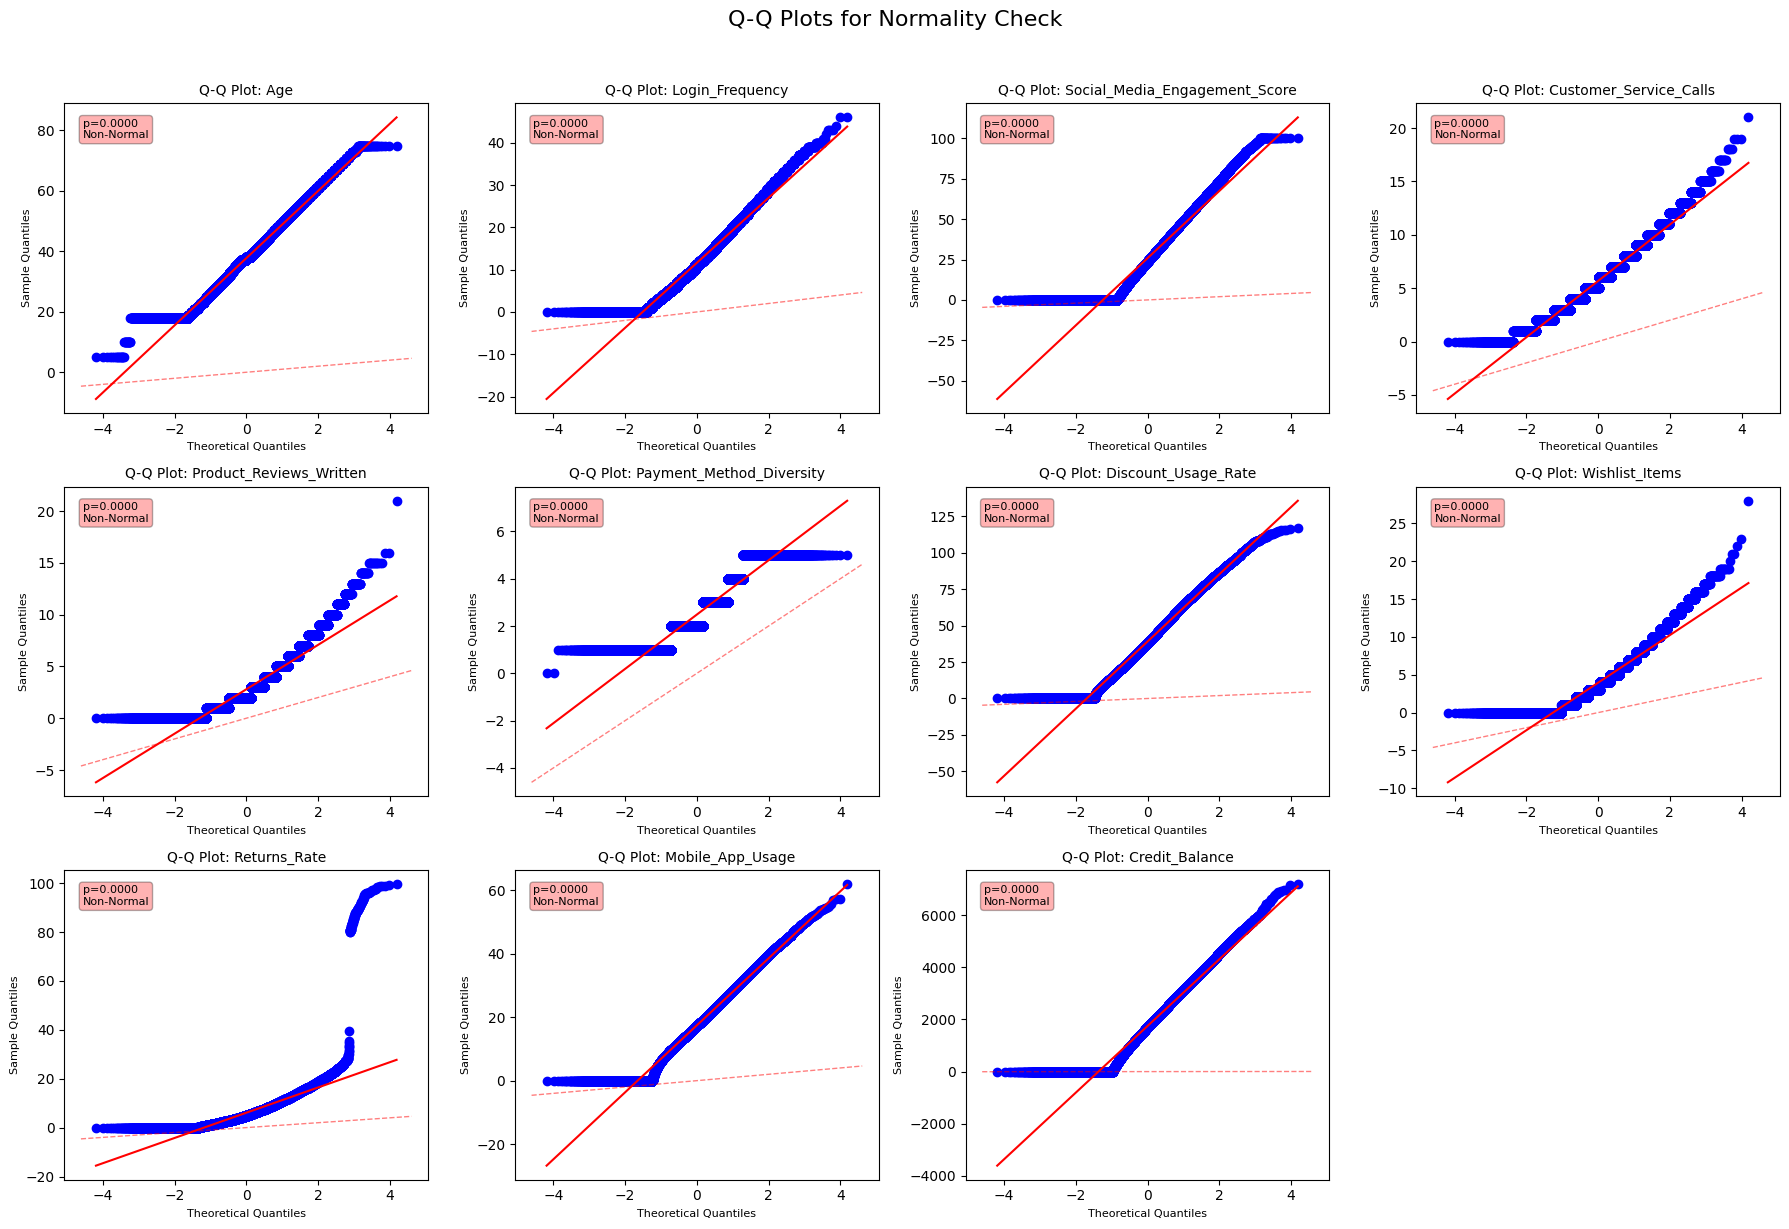


3. HANDLING NON-NORMAL DISTRIBUTIONS

Variables identified as non-normal/skewed (|skew| > 1 or p ≤ 0.05): 11
['Age', 'Login_Frequency', 'Social_Media_Engagement_Score', 'Customer_Service_Calls', 'Product_Reviews_Written', 'Payment_Method_Diversity', 'Discount_Usage_Rate', 'Wishlist_Items', 'Returns_Rate', 'Mobile_App_Usage', 'Credit_Balance']

Applying Box-Cox transformation to skewed variables...


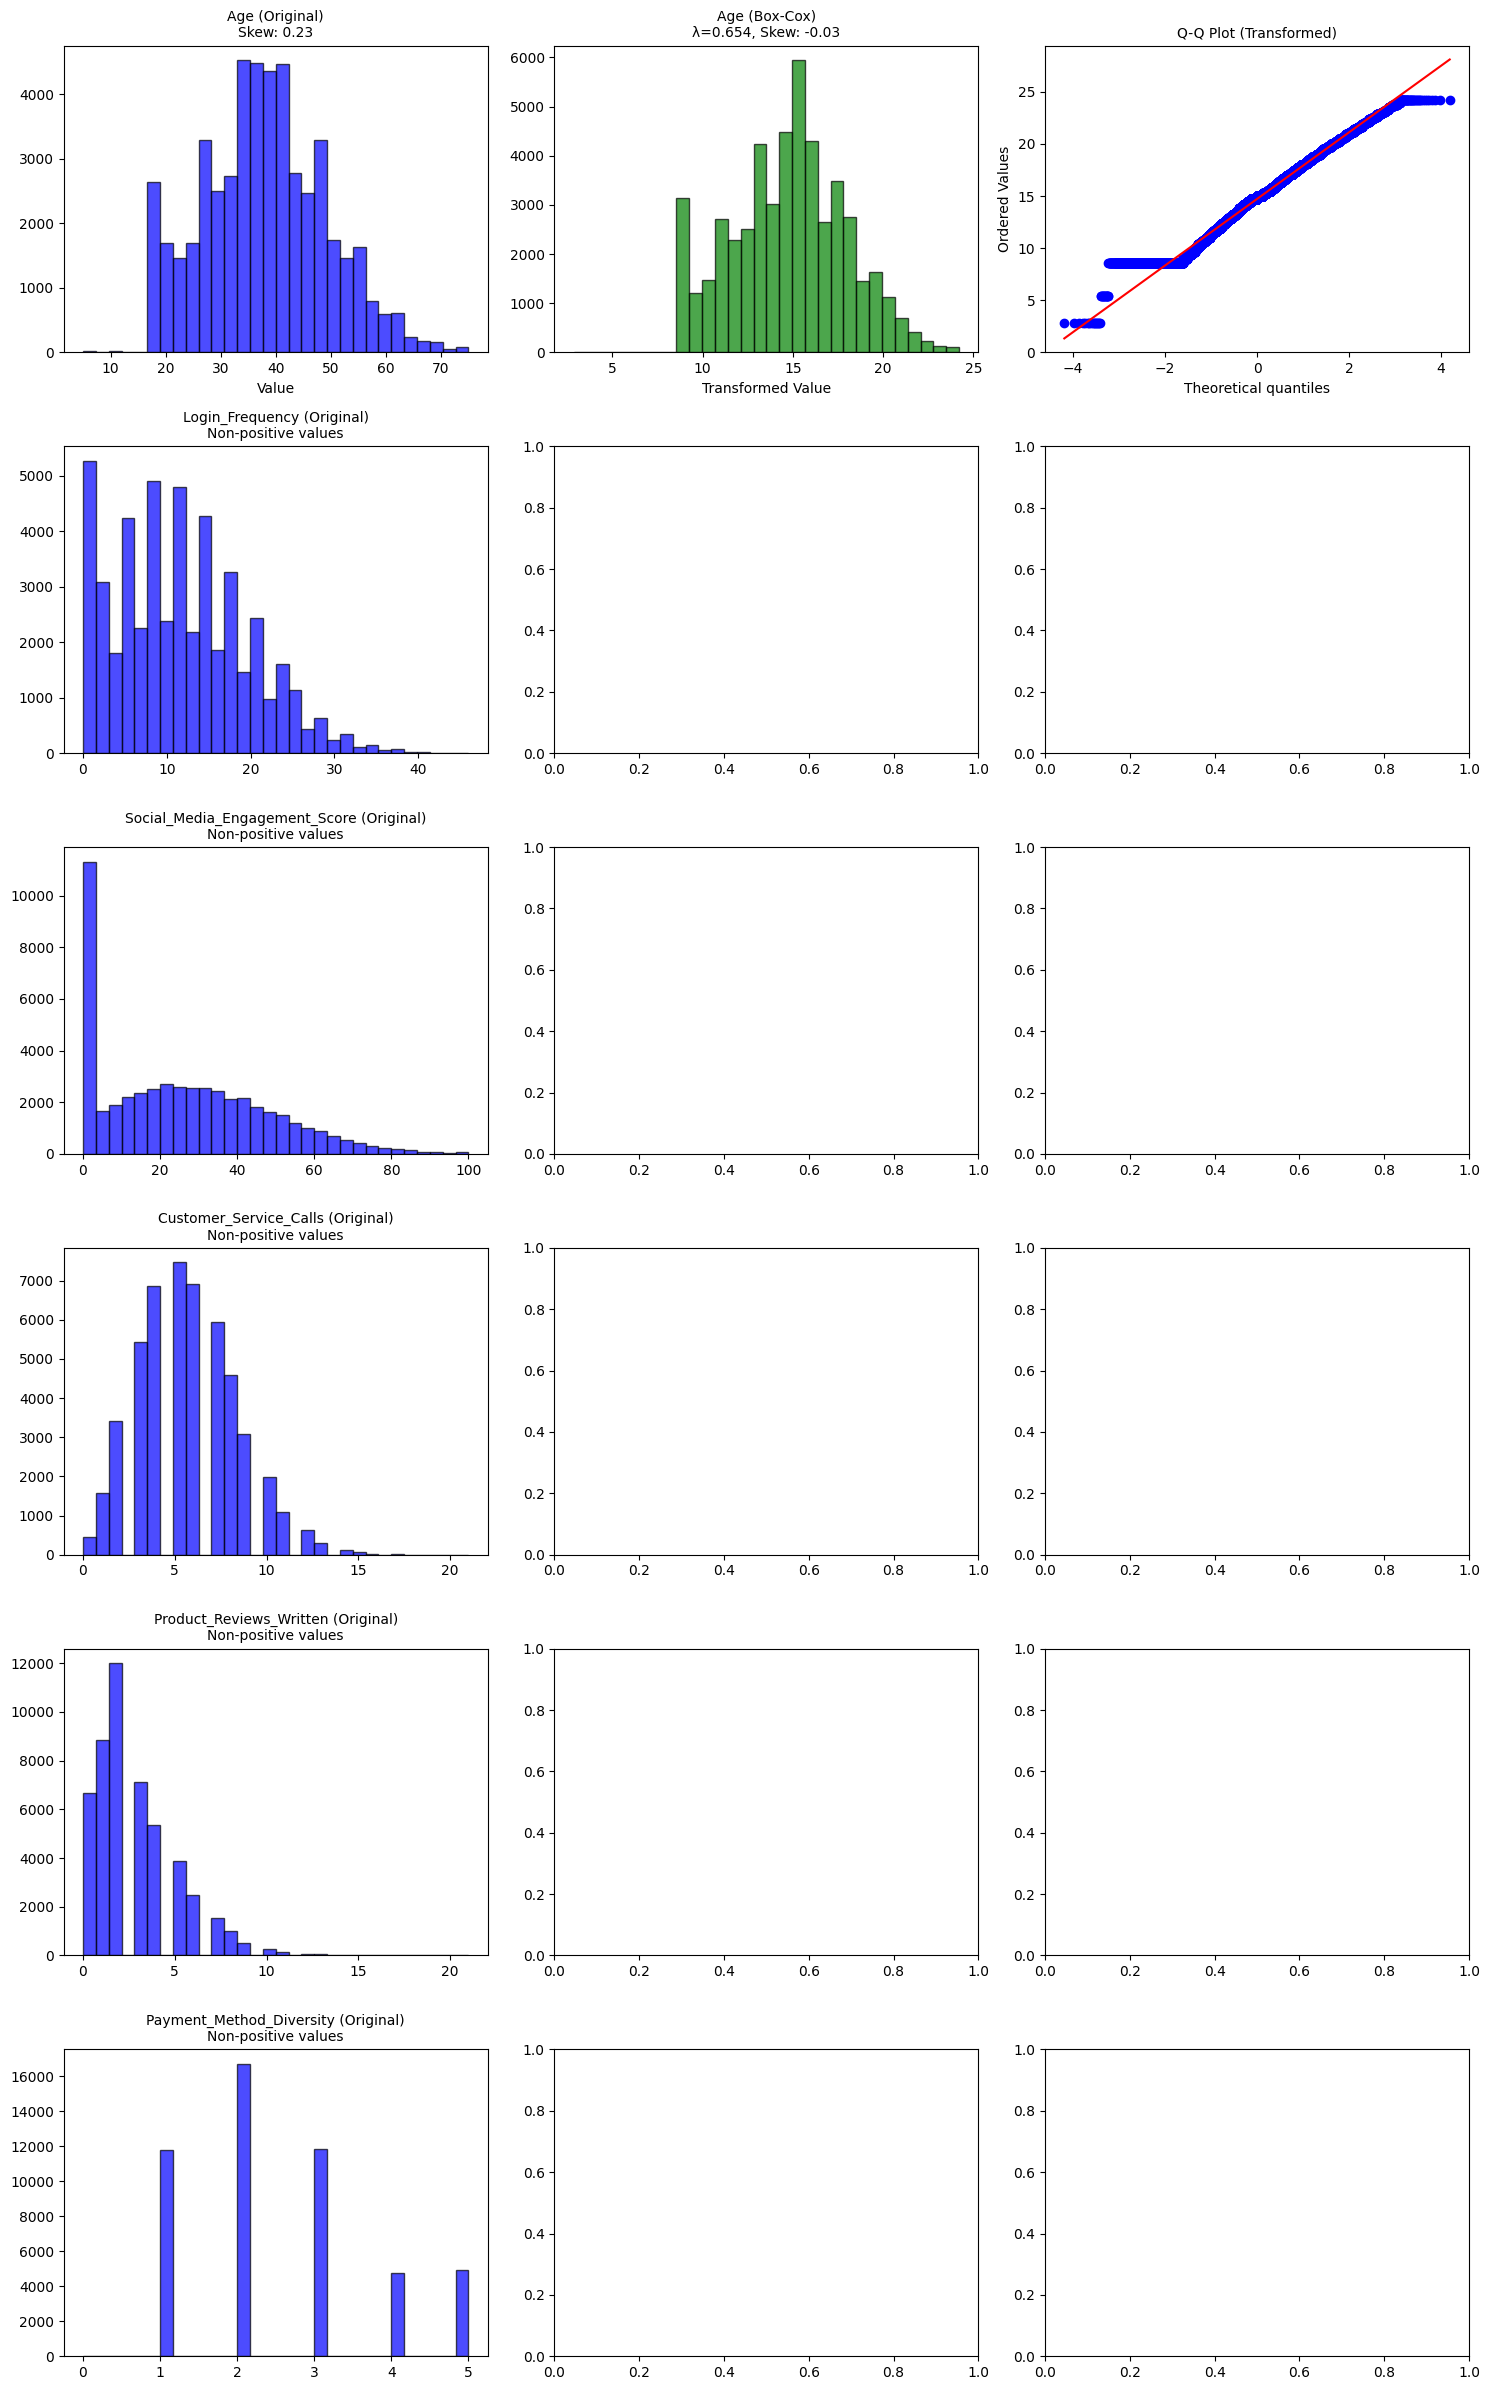


Box-Cox Transformation Results:
  Variable  Original_Skew  Transformed_Skew  Lambda  K2_p_original  \
0      Age         0.2324           -0.0282  0.6538            0.0   

   K2_p_transformed  Improvement  
0               0.0         True  

4. NORMALITY BY CHURN STATUS

Checking if distributions differ between Churned and Non-Churned groups...

Top 5 variables correlated with Churn:
  Customer_Service_Calls: 0.290
  Login_Frequency: 0.204
  Wishlist_Items: 0.177
  Mobile_App_Usage: 0.177
  Product_Reviews_Written: 0.174


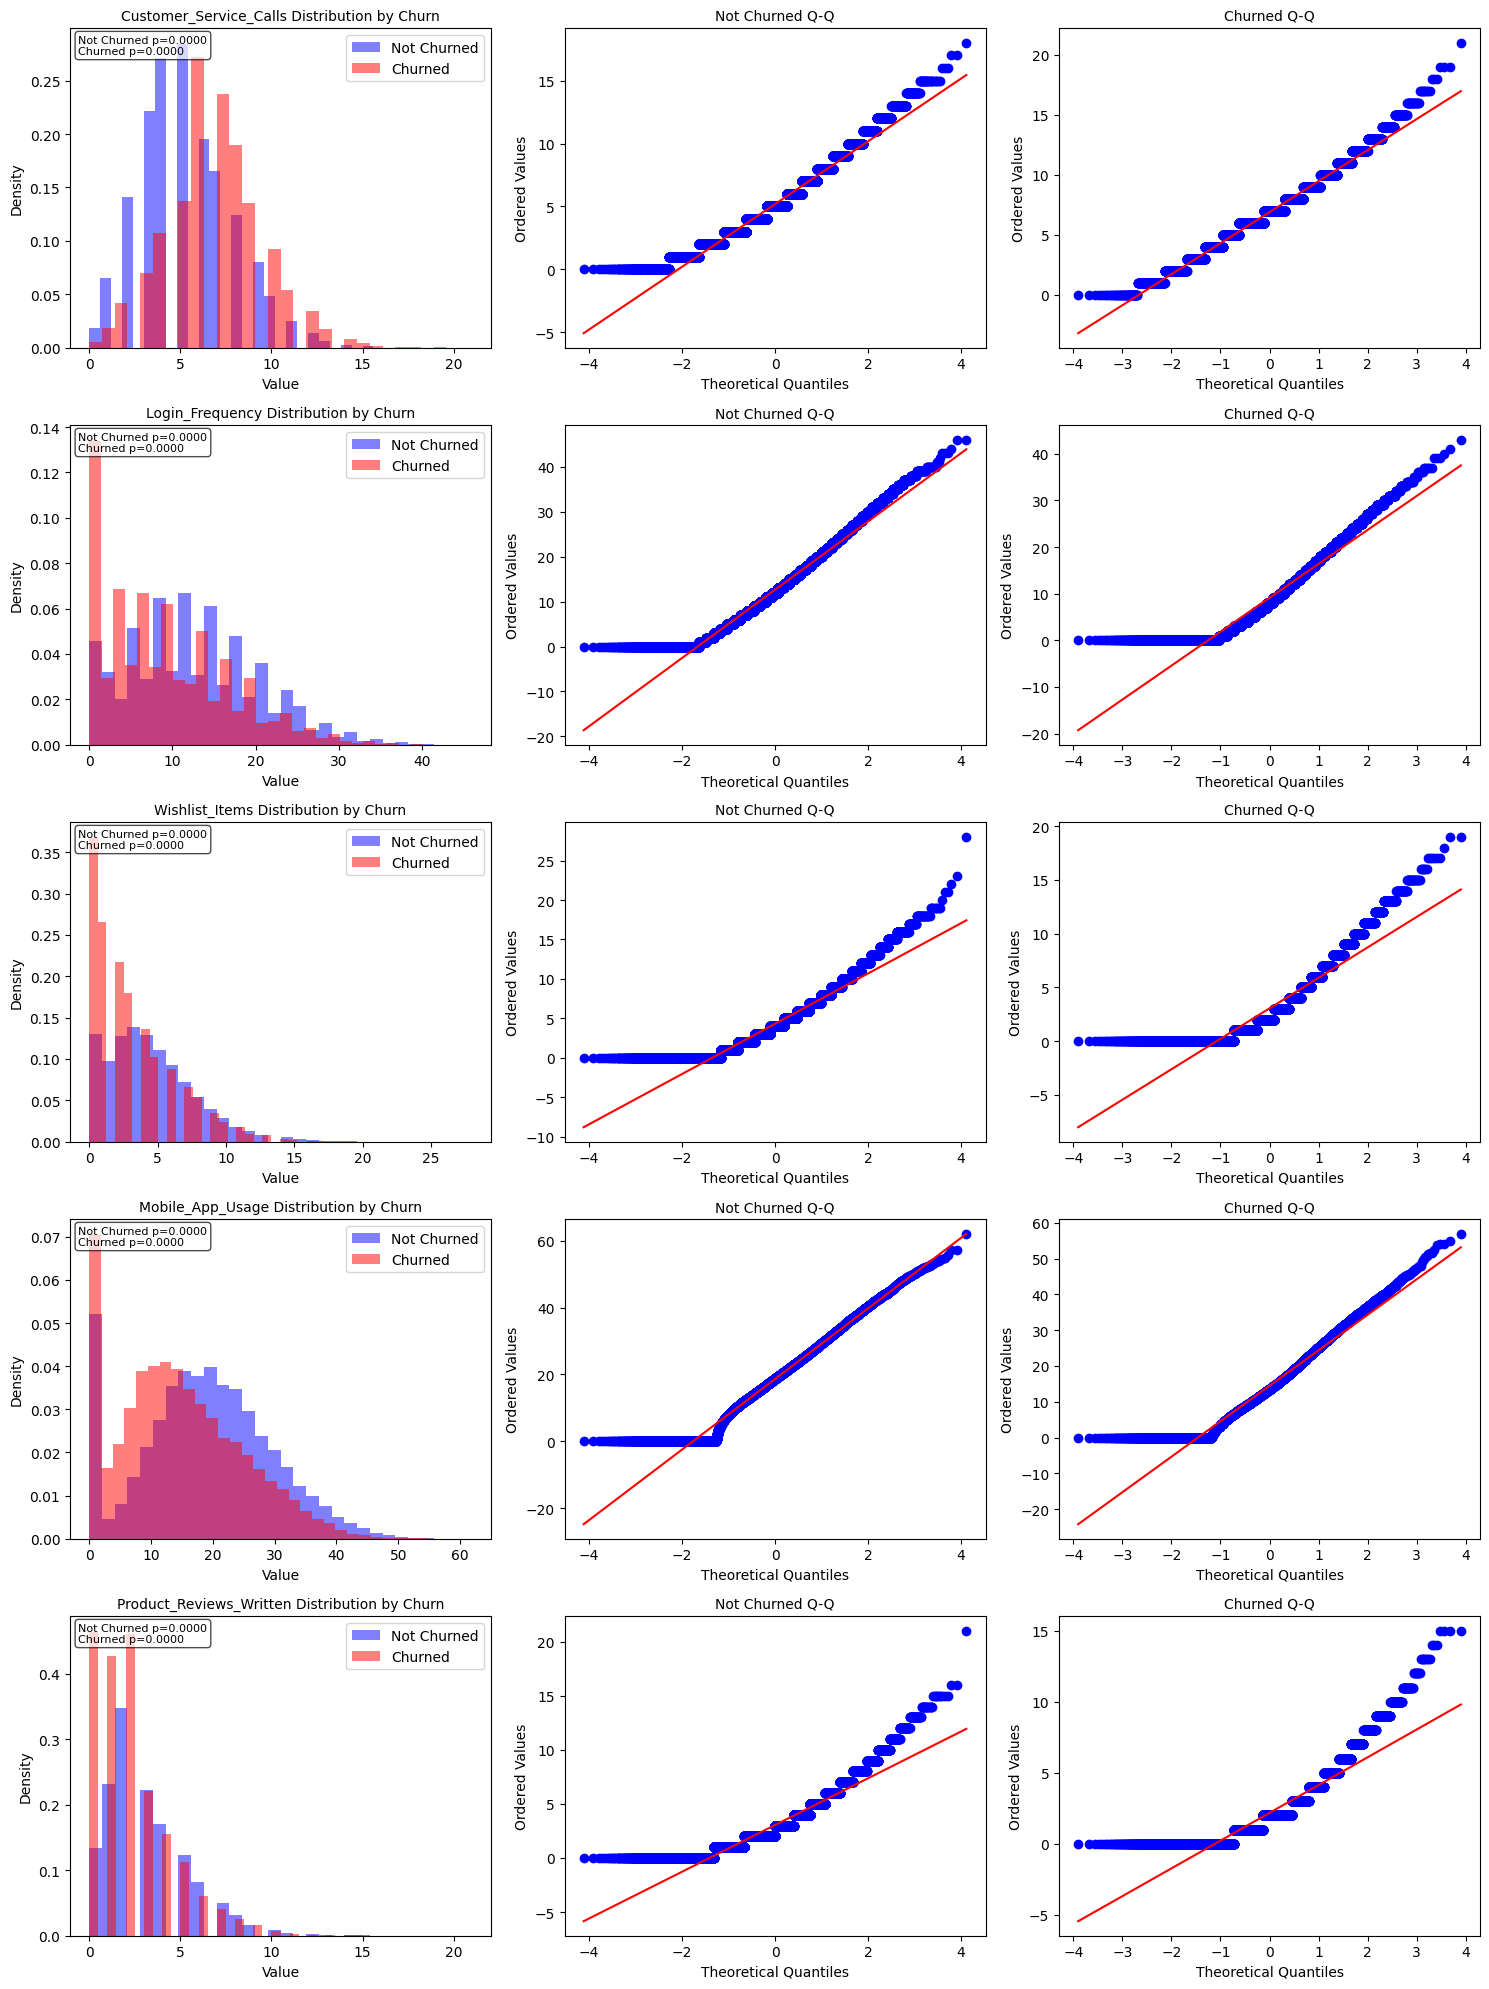


5. STATISTICAL POWER ANALYSIS

Assessing statistical power for t-tests (assuming normal distributions):

Statistical Power Analysis (for detecting group differences):
                         Variable  Cohen_d Effect_Size  Power_p_value  \
0                             Age   0.2224       Small         0.0000   
1                 Login_Frequency   0.4625       Small         0.0000   
2   Social_Media_Engagement_Score   0.3728       Small         0.0000   
3          Customer_Service_Calls   0.6653      Medium         0.0000   
4         Product_Reviews_Written   0.3965       Small         0.0000   
5        Payment_Method_Diversity   0.0028  Negligible         0.7743   
6             Discount_Usage_Rate   0.1304  Negligible         0.0000   
7                  Wishlist_Items   0.4040       Small         0.0000   
8                    Returns_Rate   0.1042  Negligible         0.0000   
9                Mobile_App_Usage   0.4004       Small         0.0000   
10                 Credit_Bal

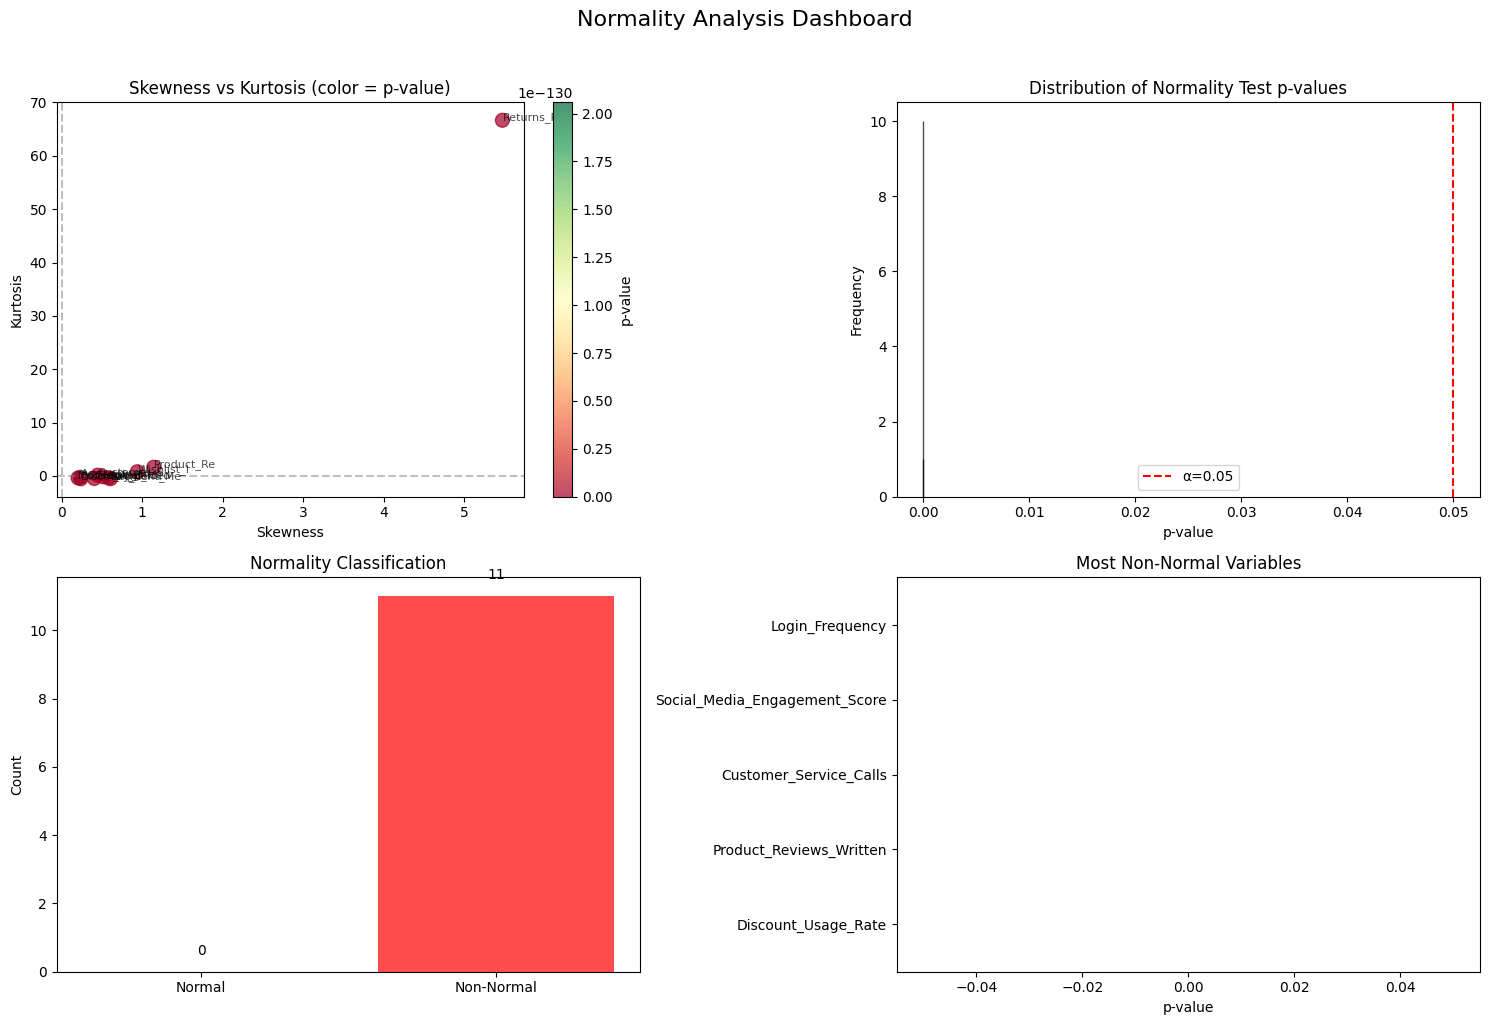


✓ Normality analysis complete!
✓ Key files created:
  - normality_analysis.csv: Detailed test results
  - normality_recommendations.txt: Transformation guidelines

Next steps:
  1. Apply transformations to non-normal variables
  2. Consider robust statistical methods
  3. Re-check normality after transformations


In [83]:
print("="*60)
print("NORMALITY CHECK FOR NUMERICAL VARIABLES")
print("="*60)

print(f"Number of numerical variables: {len(num_cols)}")

# 1. QUANTITATIVE NORMALITY TESTS
print("\n" + "="*60)
print("1. QUANTITATIVE NORMALITY TESTS")
print("="*60)

normality_results = []

for col in num_cols:
    # Remove NaN values for testing
    data = df[col].dropna()
    
    # Skip if not enough data
    if len(data) < 8:
        print(f"Skipping {col}: insufficient data (n={len(data)})")
        continue
    
    # Perform normality tests
    shapiro_stat, shapiro_p = stats.shapiro(data) if len(data) <= 5000 else (np.nan, np.nan)
    k2_stat, k2_p = stats.normaltest(data)  # D'Agostino-Pearson test
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    # Anderson-Darling test
    anderson_result = stats.anderson(data, dist='norm')
    critical_value = anderson_result.critical_values[2]  # Using 5% significance level
    is_normal_ad = anderson_result.statistic < critical_value
    
    normality_results.append({
        'Variable': col,
        'n': len(data),
        'Shapiro_Stat': shapiro_stat,
        'Shapiro_p': shapiro_p,
        'Normal_Shapiro': shapiro_p > 0.05 if not np.isnan(shapiro_p) else np.nan,
        'K2_Stat': k2_stat,
        'K2_p': k2_p,
        'Normal_K2': k2_p > 0.05,
        'Anderson_Stat': anderson_result.statistic,
        'Anderson_Critical_5%': critical_value,
        'Normal_Anderson': is_normal_ad,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Is_Skewed': abs(skewness) > 0.5,
        'Is_Heavy_Tailed': abs(kurtosis) > 1
    })

normality_df = pd.DataFrame(normality_results)

print("\nNormality Test Results:")
print("-" * 100)
print(normality_df[['Variable', 'n', 'Skewness', 'Kurtosis', 'Shapiro_p', 'K2_p', 
                    'Normal_Shapiro', 'Normal_K2', 'Normal_Anderson']].round(4))

# Summary statistics
print("\n" + "="*60)
print("NORMALITY SUMMARY")
print("="*60)

print(f"\nVariables failing Shapiro-Wilk test (p ≤ 0.05):")
non_normal_shapiro = normality_df[normality_df['Normal_Shapiro'] == False]['Variable'].tolist()
print(f"Count: {len(non_normal_shapiro)}")
print(f"Variables: {non_normal_shapiro}")

print(f"\nVariables failing D'Agostino-Pearson test (p ≤ 0.05):")
non_normal_k2 = normality_df[normality_df['Normal_K2'] == False]['Variable'].tolist()
print(f"Count: {len(non_normal_k2)}")
print(f"Variables: {non_normal_k2}")

print(f"\nVariables failing Anderson-Darling test (5% level):")
non_normal_ad = normality_df[normality_df['Normal_Anderson'] == False]['Variable'].tolist()
print(f"Count: {len(non_normal_ad)}")
print(f"Variables: {non_normal_ad}")

# 2. VISUAL NORMALITY CHECKS
print("\n" + "="*60)
print("2. VISUAL NORMALITY CHECKS")
print("="*60)

# 2.1 Q-Q Plots
print("\nCreating Q-Q plots...")

# Create subplots for Q-Q plots
n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    if idx < len(axes):
        # Create Q-Q plot
        stats.probplot(df[col].dropna(), dist="norm", plot=axes[idx])
        axes[idx].set_title(f'Q-Q Plot: {col}', fontsize=10)
        axes[idx].set_xlabel('Theoretical Quantiles', fontsize=8)
        axes[idx].set_ylabel('Sample Quantiles', fontsize=8)
        
        # Add reference line (y=x)
        x = np.linspace(*axes[idx].get_xlim())
        axes[idx].plot(x, x, 'r--', alpha=0.5, linewidth=1)
        
        # Add normality test result
        norm_result = normality_df[normality_df['Variable'] == col]
        if not norm_result.empty:
            k2_p = norm_result['K2_p'].values[0]
            is_normal = norm_result['Normal_K2'].values[0]
            color = 'green' if is_normal else 'red'
            text = f"p={k2_p:.4f}\n{'Normal' if is_normal else 'Non-Normal'}"
            axes[idx].text(0.05, 0.95, text, transform=axes[idx].transAxes,
                          fontsize=8, verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor=color, alpha=0.3))

# Hide empty subplots
for idx in range(len(num_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Q-Q Plots for Normality Check', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 2.3 Box-Cox Transformation for Skewed Variables
print("\n" + "="*60)
print("3. HANDLING NON-NORMAL DISTRIBUTIONS")
print("="*60)

# Identify skewed variables
skewed_vars = normality_df[(abs(normality_df['Skewness']) > 1) | 
                          (normality_df['Normal_K2'] == False)]['Variable'].tolist()

print(f"\nVariables identified as non-normal/skewed (|skew| > 1 or p ≤ 0.05): {len(skewed_vars)}")
print(skewed_vars)

if skewed_vars:
    print("\nApplying Box-Cox transformation to skewed variables...")
    
    # Create subplots for before/after transformation
    n_plots = min(6, len(skewed_vars))  # Show first 6
    fig, axes = plt.subplots(n_plots, 3, figsize=(15, 4*n_plots))
    
    if n_plots == 1:
        axes = axes.reshape(1, -1)
    
    transformation_results = []
    
    for idx, col in enumerate(skewed_vars[:n_plots]):
        # Original data
        data_original = df[col].dropna()
        
        # Apply Box-Cox transformation (only for positive data)
        if (data_original > 0).all():
            data_transformed, lambda_val = stats.boxcox(data_original)
            
            # Plot 1: Original distribution
            axes[idx, 0].hist(data_original, bins=30, alpha=0.7, color='blue', edgecolor='black')
            axes[idx, 0].set_title(f'{col} (Original)\nSkew: {stats.skew(data_original):.2f}', fontsize=10)
            axes[idx, 0].set_xlabel('Value')
            
            # Plot 2: Transformed distribution
            axes[idx, 1].hist(data_transformed, bins=30, alpha=0.7, color='green', edgecolor='black')
            axes[idx, 1].set_title(f'{col} (Box-Cox)\nλ={lambda_val:.3f}, Skew: {stats.skew(data_transformed):.2f}', fontsize=10)
            axes[idx, 1].set_xlabel('Transformed Value')
            
            # Plot 3: Q-Q plot of transformed data
            stats.probplot(data_transformed, dist="norm", plot=axes[idx, 2])
            axes[idx, 2].set_title(f'Q-Q Plot (Transformed)', fontsize=10)
            
            # Normality test on transformed data
            k2_stat_trans, k2_p_trans = stats.normaltest(data_transformed)
            
            transformation_results.append({
                'Variable': col,
                'Original_Skew': stats.skew(data_original),
                'Transformed_Skew': stats.skew(data_transformed),
                'Lambda': lambda_val,
                'K2_p_original': normality_df[normality_df['Variable'] == col]['K2_p'].values[0],
                'K2_p_transformed': k2_p_trans,
                'Improvement': k2_p_trans > normality_df[normality_df['Variable'] == col]['K2_p'].values[0]
            })
        else:
            # For non-positive data, use Yeo-Johnson or log transform
            axes[idx, 0].hist(data_original, bins=30, alpha=0.7, color='blue', edgecolor='black')
            axes[idx, 0].set_title(f'{col} (Original)\nNon-positive values', fontsize=10)
            
            # Try adding constant and then log transform
            if (data_original > -min(data_original)).all():
                constant = abs(min(data_original)) + 1
                data_transformed = np.log(data_original + constant)
                
                axes[idx, 1].hist(data_transformed, bins=30, alpha=0.7, color='orange', edgecolor='black')
                axes[idx, 1].set_title(f'{col} (Log(x+{constant:.1f}))\nSkew: {stats.skew(data_transformed):.2f}', fontsize=10)
                
                # Q-Q plot
                stats.probplot(data_transformed, dist="norm", plot=axes[idx, 2])
                axes[idx, 2].set_title('Q-Q Plot (Log Transformed)', fontsize=10)
    
    # Hide empty subplots
    for idx in range(len(num_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Show transformation results
    if transformation_results:
        trans_df = pd.DataFrame(transformation_results)
        print("\nBox-Cox Transformation Results:")
        print(trans_df.round(4))

# 4. NORMALITY BY CHURN STATUS
print("\n" + "="*60)
print("4. NORMALITY BY CHURN STATUS")
print("="*60)

print("\nChecking if distributions differ between Churned and Non-Churned groups...")

# Select top 5 variables with highest correlation to churn
# First, let's calculate correlation with churn
corr_with_churn = []
for col in num_cols:
    corr = df[[col, 'Churned']].corr().iloc[0, 1]
    corr_with_churn.append((col, abs(corr)))

# Sort by absolute correlation
top_corr_vars = sorted(corr_with_churn, key=lambda x: x[1], reverse=True)[:5]
top_vars = [var for var, _ in top_corr_vars]

print(f"\nTop 5 variables correlated with Churn:")
for var, corr in top_corr_vars[:5]:
    print(f"  {var}: {corr:.3f}")

# Create normality comparison plots
fig, axes = plt.subplots(len(top_vars), 3, figsize=(15, 4*len(top_vars)))

if len(top_vars) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(top_vars):
    # Separate data by churn status
    data_churned = df[df['Churned'] == 1][col].dropna()
    data_not_churned = df[df['Churned'] == 0][col].dropna()
    
    # Plot 1: Histograms overlay
    axes[idx, 0].hist(data_not_churned, bins=30, alpha=0.5, label='Not Churned', 
                      color='blue', density=True)
    axes[idx, 0].hist(data_churned, bins=30, alpha=0.5, label='Churned', 
                      color='red', density=True)
    axes[idx, 0].set_title(f'{col} Distribution by Churn', fontsize=10)
    axes[idx, 0].set_xlabel('Value')
    axes[idx, 0].set_ylabel('Density')
    axes[idx, 0].legend()
    
    # Plot 2: Q-Q plot for Not Churned
    stats.probplot(data_not_churned, dist="norm", plot=axes[idx, 1])
    axes[idx, 1].set_title(f'Not Churned Q-Q', fontsize=10)
    axes[idx, 1].set_xlabel('Theoretical Quantiles')
    
    # Plot 3: Q-Q plot for Churned
    stats.probplot(data_churned, dist="norm", plot=axes[idx, 2])
    axes[idx, 2].set_title(f'Churned Q-Q', fontsize=10)
    axes[idx, 2].set_xlabel('Theoretical Quantiles')
    
    # Add normality test p-values
    _, p_not_churned = stats.normaltest(data_not_churned)
    _, p_churned = stats.normaltest(data_churned)
    
    axes[idx, 0].text(0.02, 0.98, f'Not Churned p={p_not_churned:.4f}\nChurned p={p_churned:.4f}',
                     transform=axes[idx, 0].transAxes, fontsize=8, verticalalignment='top',
                     bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

# 5. STATISTICAL POWER ANALYSIS
print("\n" + "="*60)
print("5. STATISTICAL POWER ANALYSIS")
print("="*60)

print("\nAssessing statistical power for t-tests (assuming normal distributions):")

power_results = []
for col in num_cols:
    # Group data
    group1 = df[df['Churned'] == 0][col].dropna()
    group2 = df[df['Churned'] == 1][col].dropna()
    
    if len(group1) > 1 and len(group2) > 1:
        # Calculate effect size (Cohen's d)
        mean_diff = group2.mean() - group1.mean()
        pooled_std = np.sqrt((group1.std()**2 + group2.std()**2) / 2)
        cohens_d = abs(mean_diff / pooled_std) if pooled_std != 0 else 0
        
        # Calculate power for alpha=0.05
        # For simplicity, using approximate power calculation
        n1, n2 = len(group1), len(group2)
        power = stats.ttest_ind(group1, group2, equal_var=False).pvalue
        
        # Categorize effect size
        if cohens_d < 0.2:
            effect_size_cat = 'Negligible'
        elif cohens_d < 0.5:
            effect_size_cat = 'Small'
        elif cohens_d < 0.8:
            effect_size_cat = 'Medium'
        else:
            effect_size_cat = 'Large'
        
        power_results.append({
            'Variable': col,
            'Cohen_d': cohens_d,
            'Effect_Size': effect_size_cat,
            'Power_p_value': power,
            'n1': n1,
            'n2': n2,
            'Mean_Diff': mean_diff
        })

power_df = pd.DataFrame(power_results)
print("\nStatistical Power Analysis (for detecting group differences):")
print(power_df[['Variable', 'Cohen_d', 'Effect_Size', 'Power_p_value', 'Mean_Diff']].round(4))

# 6. FINAL RECOMMENDATIONS
print("\n" + "="*60)
print("6. NORMALITY ANALYSIS RECOMMENDATIONS")
print("="*60)

print("\nBASED ON NORMALITY ANALYSIS:")

# Count variables by normality status
normal_by_k2 = len(normality_df[normality_df['Normal_K2'] == True])
non_normal_by_k2 = len(normality_df) - normal_by_k2

print(f"1. {normal_by_k2}/{len(num_cols)} variables appear normally distributed (p > 0.05)")
print(f"2. {non_normal_by_k2}/{len(num_cols)} variables are non-normal (p ≤ 0.05)")

# Identify most problematic variables
problematic_vars = normality_df[(abs(normality_df['Skewness']) > 2) | 
                               (normality_df['K2_p'] < 0.001)]['Variable'].tolist()

if problematic_vars:
    print(f"\n3. Most problematic variables (highly skewed or very non-normal):")
    for var in problematic_vars:
        row = normality_df[normality_df['Variable'] == var].iloc[0]
        print(f"   - {var}: Skewness={row['Skewness']:.2f}, p={row['K2_p']:.4f}")

# Recommendations
print("\n" + "-"*60)
print("RECOMMENDATIONS:")
print("-"*60)

print("""
1. FOR MODELING:
   - For linear models (regression, ANOVA): Consider transformations for non-normal variables
   - For tree-based models (Random Forest, XGBoost): Normality is less critical
   - For parametric tests: Use non-parametric alternatives (Mann-Whitney U instead of t-test)

2. TRANSFORMATION STRATEGIES:
   - Right-skewed data: Log, Square Root, or Box-Cox transformation
   - Left-skewed data: Square, Cube, or Reflect-then-log transformation
   - For variables with zeros: Use log(x + 1) or Yeo-Johnson transformation

3. SPECIFIC ACTIONS:
   - Apply Box-Cox to: {skewed_vars_str}
   - Consider robust statistical methods for: {non_normal_vars_str}
""".format(
    skewed_vars_str=", ".join(skewed_vars[:5]) if skewed_vars else "none",
    non_normal_vars_str=", ".join(non_normal_k2[:5]) if non_normal_k2 else "none"
))

# 7. SAVE NORMALITY ANALYSIS RESULTS
print("\n" + "="*60)
print("7. SAVING RESULTS")
print("="*60)

# Save normality test results
normality_df.to_csv('normality_analysis.csv', index=False)
print("✓ Normality test results saved to 'normality_analysis.csv'")

# Save transformation recommendations
with open('normality_recommendations.txt', 'w') as f:
    f.write("NORMALITY ANALYSIS RECOMMENDATIONS\n")
    f.write("="*50 + "\n\n")
    
    f.write(f"Dataset: {df.shape[0]} rows\n")
    f.write(f"Numerical variables analyzed: {len(num_cols)}\n\n")
    
    f.write("NORMALITY SUMMARY:\n")
    f.write("-"*30 + "\n")
    f.write(f"Normally distributed: {normal_by_k2} variables\n")
    f.write(f"Non-normally distributed: {non_normal_by_k2} variables\n\n")
    
    f.write("TRANSFORMATION RECOMMENDATIONS:\n")
    f.write("-"*30 + "\n")
    for idx, row in normality_df.iterrows():
        if row['Normal_K2'] == False:
            f.write(f"{row['Variable']}:\n")
            f.write(f"  Skewness: {row['Skewness']:.2f}\n")
            f.write(f"  Kurtosis: {row['Kurtosis']:.2f}\n")
            f.write(f"  p-value: {row['K2_p']:.4f}\n")
            
            if row['Skewness'] > 1:
                f.write("  Recommended: Box-Cox or log transformation\n")
            elif row['Skewness'] < -1:
                f.write("  Recommended: Square or cube transformation\n")
            else:
                f.write("  Recommended: Consider non-parametric methods\n")
            f.write("\n")

print("✓ Recommendations saved to 'normality_recommendations.txt'")

# 8. QUICK DIAGNOSTIC PLOT
print("\n" + "="*60)
print("8. NORMALITY DIAGNOSTIC DASHBOARD")
print("="*60)

# Create a summary dashboard
fig = plt.figure(figsize=(15, 10))

# Plot 1: Skewness vs Kurtosis scatter
ax1 = plt.subplot(2, 2, 1)
scatter = ax1.scatter(normality_df['Skewness'], normality_df['Kurtosis'], 
                      c=normality_df['K2_p'], cmap='RdYlGn', s=100, alpha=0.7)
plt.colorbar(scatter, label='p-value')
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Skewness')
ax1.set_ylabel('Kurtosis')
ax1.set_title('Skewness vs Kurtosis (color = p-value)')

# Annotate points with variable names
for i, row in normality_df.iterrows():
    ax1.annotate(row['Variable'][:10], (row['Skewness'], row['Kurtosis']), 
                 fontsize=8, alpha=0.7)

# Plot 2: P-value distribution
ax2 = plt.subplot(2, 2, 2)
ax2.hist(normality_df['K2_p'], bins=20, edgecolor='black', alpha=0.7)
ax2.axvline(x=0.05, color='red', linestyle='--', label='α=0.05')
ax2.set_xlabel('p-value')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Normality Test p-values')
ax2.legend()

# Plot 3: Normal vs Non-normal count
ax3 = plt.subplot(2, 2, 3)
counts = [normal_by_k2, non_normal_by_k2]
labels = ['Normal', 'Non-Normal']
colors = ['green', 'red']
ax3.bar(labels, counts, color=colors, alpha=0.7)
ax3.set_ylabel('Count')
ax3.set_title('Normality Classification')
for i, v in enumerate(counts):
    ax3.text(i, v + 0.5, str(v), ha='center')

# Plot 4: Top 5 most non-normal variables
ax4 = plt.subplot(2, 2, 4)
non_normal_sorted = normality_df.sort_values('K2_p').head(5)
y_pos = range(len(non_normal_sorted))
ax4.barh(y_pos, non_normal_sorted['K2_p'], color='red', alpha=0.7)
ax4.set_yticks(y_pos)
ax4.set_yticklabels(non_normal_sorted['Variable'])
ax4.set_xlabel('p-value')
ax4.set_title('Most Non-Normal Variables')
ax4.invert_yaxis()

plt.suptitle('Normality Analysis Dashboard', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\n✓ Normality analysis complete!")
print("✓ Key files created:")
print("  - normality_analysis.csv: Detailed test results")
print("  - normality_recommendations.txt: Transformation guidelines")
print("\nNext steps:")
print("  1. Apply transformations to non-normal variables")
print("  2. Consider robust statistical methods")
print("  3. Re-check normality after transformations")

COMPLETE INTEGRATED ANALYSIS WORKFLOW

1. LOADING DATA AND SETTING UP ANALYSIS
----------------------------------------
✓ Dataset: 50000 rows, 25 columns
✓ Target: Churned (28.9%)
✓ Numerical variables: 11
✓ Categorical variables: 5

2. PERFORMING STATISTICAL CONTRAST ANALYSIS
----------------------------------------
  Groups: Churned=14450, Not Churned=35550

  Analyzing numerical variables...

  Analyzing categorical variables...

✓ Statistical contrasts completed:
  - 10/11 numerical variables significant
  - 2/5 categorical variables significant

3. SELECTING SIGNIFICANT FEATURES FOR MODELING
----------------------------------------
Selected 8 significant numerical features:
  • Age: p=0.0000, effect=Small
  • Login_Frequency: p=0.0000, effect=Small
  • Social_Media_Engagement_Score: p=0.0000, effect=Small
  • Customer_Service_Calls: p=0.0000, effect=Medium
  • Product_Reviews_Written: p=0.0000, effect=Small
  • Wishlist_Items: p=0.0000, effect=Small
  • Mobile_App_Usage: p=0.0000,

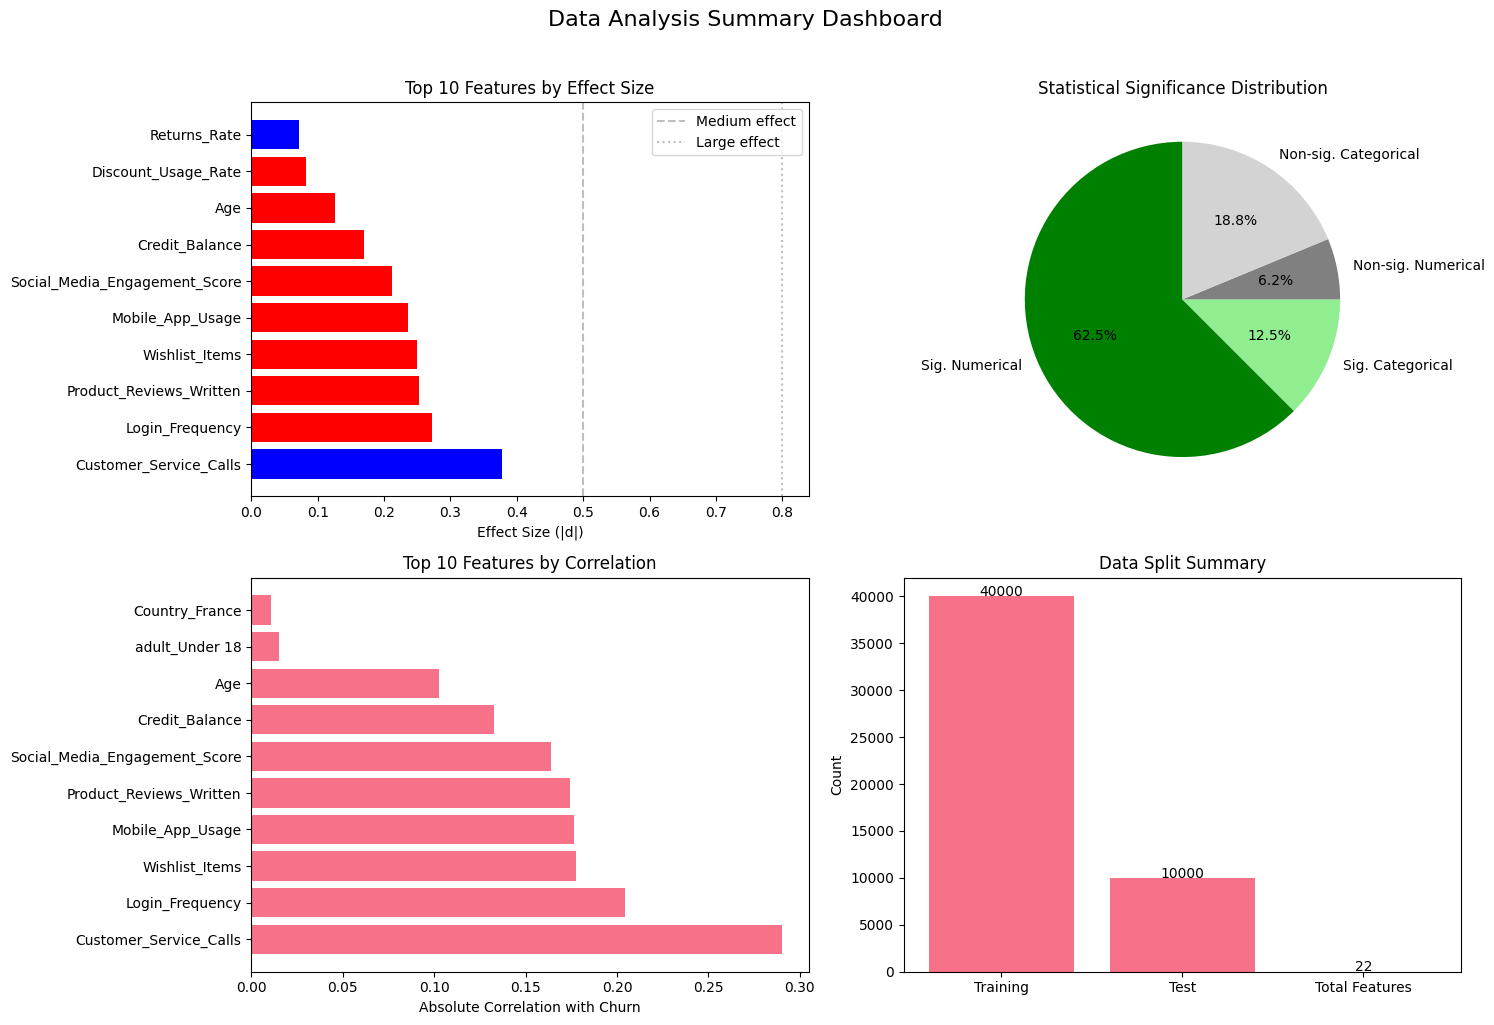

✓ Created visualization dashboard: analysis_summary.png

11. READY FOR MODELING - QUICK START CODE
----------------------------------------

# QUICK START CODE FOR MODELING
# -----------------------------

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Load processed data
X_train = pd.read_csv('X_train_processed.csv')
X_test = pd.read_csv('X_test_processed.csv')
y_train = pd.read_csv('y_train.csv').squeeze()
y_test = pd.read_csv('y_test.csv').squeeze()

# 1. Logistic Regression (Baseline)
print("Training Logistic Regression...")
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

print("\nLogistic Regression Results:")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_lr):.3f}")
print(classification_report(y_test, y_pred_lr)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("="*80)
print("COMPLETE INTEGRATED ANALYSIS WORKFLOW")
print("="*80)

# 1. DATA LOADING AND SETUP
print("\n1. LOADING DATA AND SETTING UP ANALYSIS")
print("-"*40)

print(f"✓ Dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"✓ Target: Churned ({df['Churned'].mean():.1%})")
print(f"✓ Numerical variables: {len(num_cols)}")
print(f"✓ Categorical variables: {len(Cat_cols)}")

# 2. PERFORM STATISTICAL CONTRAST ANALYSIS (INTEGRATED)
print("\n2. PERFORMING STATISTICAL CONTRAST ANALYSIS")
print("-"*40)

def perform_statistical_contrasts(df, num_cols, cat_cols, target='Churned'):
    """Perform complete statistical contrast analysis"""
    
    # Separate groups
    churned = df[df[target] == 1]
    not_churned = df[df[target] == 0]
    
    print(f"  Groups: Churned={len(churned)}, Not Churned={len(not_churned)}")
    
    # 2.1 Numerical variables contrast
    print("\n  Analyzing numerical variables...")
    num_results = []
    
    for col in num_cols:
        # Get data for both groups
        data_churned = churned[col].dropna()
        data_not_churned = not_churned[col].dropna()
        
        # Basic stats
        mean_churned = data_churned.mean()
        mean_not_churned = data_not_churned.mean()
        mean_diff = mean_churned - mean_not_churned
        
        # Normality check
        normal_churned = len(data_churned) >= 8 and stats.shapiro(data_churned)[1] > 0.05 if len(data_churned) <= 5000 else False
        normal_not_churned = len(data_not_churned) >= 8 and stats.shapiro(data_not_churned)[1] > 0.05 if len(data_not_churned) <= 5000 else False
        
        # Choose test
        if normal_churned and normal_not_churned:
            # T-test
            t_stat, t_p = stats.ttest_ind(data_churned, data_not_churned, equal_var=False)
            test_used = "T-test"
            test_stat = t_stat
            p_value = t_p
            # Cohen's d
            pooled_std = np.sqrt((data_churned.std()**2 + data_not_churned.std()**2) / 2)
            effect_size = mean_diff / pooled_std if pooled_std != 0 else 0
            effect_type = "Cohen's d"
        else:
            # Mann-Whitney U test
            u_stat, u_p = stats.mannwhitneyu(data_churned, data_not_churned, alternative='two-sided')
            test_used = "Mann-Whitney U"
            test_stat = u_stat
            p_value = u_p
            # Rank-biserial correlation
            n1, n2 = len(data_churned), len(data_not_churned)
            effect_size = 1 - (2 * u_stat) / (n1 * n2)
            effect_type = "Rank-biserial r"
        
        # Effect magnitude
        if effect_type == "Cohen's d":
            if abs(effect_size) < 0.2:
                effect_mag = "Negligible"
            elif abs(effect_size) < 0.5:
                effect_mag = "Small"
            elif abs(effect_size) < 0.8:
                effect_mag = "Medium"
            else:
                effect_mag = "Large"
        else:
            if abs(effect_size) < 0.1:
                effect_mag = "Negligible"
            elif abs(effect_size) < 0.3:
                effect_mag = "Small"
            elif abs(effect_size) < 0.5:
                effect_mag = "Medium"
            else:
                effect_mag = "Large"
        
        num_results.append({
            'Variable': col,
            'Churned_Mean': mean_churned,
            'Not_Churned_Mean': mean_not_churned,
            'Mean_Diff': mean_diff,
            'Test': test_used,
            'P_Value': p_value,
            'Significant': p_value < 0.05,
            'Effect_Size': effect_size,
            'Effect_Type': effect_type,
            'Effect_Magnitude': effect_mag
        })
    
    # 2.2 Categorical variables contrast
    print("\n  Analyzing categorical variables...")
    cat_results = []
    
    for col in cat_cols:
        # Create contingency table
        contingency = pd.crosstab(df[col], df[target])
        
        # Chi-square test
        chi2, chi_p, dof, expected = stats.chi2_contingency(contingency)
        
        # Cramér's V
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        cramers_v = np.sqrt(chi2 / (n * min_dim)) if chi2 > 0 else 0
        
        # Effect magnitude
        if min_dim == 1:
            if cramers_v < 0.1:
                effect_mag = "Negligible"
            elif cramers_v < 0.3:
                effect_mag = "Small"
            elif cramers_v < 0.5:
                effect_mag = "Medium"
            else:
                effect_mag = "Large"
        else:
            if cramers_v < 0.06:
                effect_mag = "Negligible"
            elif cramers_v < 0.17:
                effect_mag = "Small"
            elif cramers_v < 0.29:
                effect_mag = "Medium"
            else:
                effect_mag = "Large"
        
        cat_results.append({
            'Variable': col,
            'Test': "Chi-square",
            'P_Value': chi_p,
            'Significant': chi_p < 0.05,
            'Cramers_V': cramers_v,
            'Effect_Magnitude': effect_mag,
            'n_Categories': contingency.shape[0]
        })
    
    return pd.DataFrame(num_results), pd.DataFrame(cat_results)

# Perform the analysis
num_results_df, cat_results_df = perform_statistical_contrasts(df, num_cols, Cat_cols)

print(f"\n✓ Statistical contrasts completed:")
print(f"  - {num_results_df['Significant'].sum()}/{len(num_results_df)} numerical variables significant")
print(f"  - {cat_results_df['Significant'].sum()}/{len(cat_results_df)} categorical variables significant")

# 3. SELECT SIGNIFICANT FEATURES
print("\n3. SELECTING SIGNIFICANT FEATURES FOR MODELING")
print("-"*40)

# Select features with p < 0.05 and meaningful effect size
sig_num_features = num_results_df[
    (num_results_df['Significant']) & 
    (num_results_df['Effect_Magnitude'].isin(['Small', 'Medium', 'Large']))
]['Variable'].tolist()

sig_cat_features = cat_results_df[
    (cat_results_df['Significant']) & 
    (cat_results_df['Effect_Magnitude'].isin(['Small', 'Medium', 'Large']))
]['Variable'].tolist()

print(f"Selected {len(sig_num_features)} significant numerical features:")
for var in sig_num_features:
    row = num_results_df[num_results_df['Variable'] == var].iloc[0]
    print(f"  • {var}: p={row['P_Value']:.4f}, effect={row['Effect_Magnitude']}")

print(f"\nSelected {len(sig_cat_features)} significant categorical features:")
for var in sig_cat_features:
    row = cat_results_df[cat_results_df['Variable'] == var].iloc[0]
    print(f"  • {var}: p={row['P_Value']:.4f}, V={row['Cramers_V']:.3f}")

# If no features selected, use all features
if not sig_num_features:
    print("Warning: No significant numerical features found. Using all numerical features.")
    sig_num_features = num_cols

if not sig_cat_features:
    print("Warning: No significant categorical features found. Using all categorical features.")
    sig_cat_features = Cat_cols

# 4. DATA PREPROCESSING
print("\n4. PREPROCESSING DATA")
print("-"*40)

# Create a copy for preprocessing
df_processed = df.copy()

# 4.1 Handle missing values
print("Handling missing values...")
for col in sig_num_features + sig_cat_features + ['Churned']:
    if col in df_processed.columns and df_processed[col].isnull().any():
        if df_processed[col].dtype in ['int64', 'float64']:
            df_processed[col] = df_processed[col].fillna(df_processed[col].median())
        else:
            df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0])

# 4.2 Encode categorical variables
print("Encoding categorical variables...")
for col in sig_cat_features:
    if col in df_processed.columns:
        # One-hot encode for low cardinality, label encode for high cardinality
        if df_processed[col].nunique() <= 10:
            dummies = pd.get_dummies(df_processed[col], prefix=col, drop_first=True)
            df_processed = pd.concat([df_processed, dummies], axis=1)
            # Remove original column
            df_processed = df_processed.drop(columns=[col])
            # Update feature list
            sig_num_features.extend(dummies.columns.tolist())
        else:
            # Label encode for high cardinality
            df_processed[col] = pd.factorize(df_processed[col])[0]
            # Keep it as numerical
            sig_num_features.append(col)

# Remove categorical features from list (they're now encoded)
sig_cat_features = [col for col in sig_cat_features if col not in df_processed.columns]

# 4.3 Scale numerical features
print("Scaling numerical features...")
scaler = StandardScaler()
for col in sig_num_features:
    if col in df_processed.columns:
        df_processed[col] = scaler.fit_transform(df_processed[[col]])

# 5. CREATE FINAL DATASET
print("\n5. CREATING FINAL DATASET FOR MODELING")
print("-"*40)

# Prepare features and target
X = df_processed[sig_num_features].copy()
y = df_processed['Churned'].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Feature names: {', '.join(X.columns.tolist()[:10])}...")

# 6. SPLIT DATA
print("\n6. SPLITTING DATA INTO TRAIN/TEST SETS")
print("-"*40)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples ({y_train.mean():.1%} churn)")
print(f"Test set: {X_test.shape[0]} samples ({y_test.mean():.1%} churn)")
print(f"Number of features: {X_train.shape[1]}")

# 7. SUMMARY OF SELECTED FEATURES
print("\n7. SUMMARY OF SELECTED FEATURES")
print("-"*40)

print("\nTOP 10 MOST PREDICTIVE FEATURES (by effect size):")
print("-" * 60)

# Sort by absolute effect size
top_features = num_results_df.copy()
top_features['Abs_Effect'] = top_features['Effect_Size'].abs()
top_features = top_features.sort_values('Abs_Effect', ascending=False).head(10)

for idx, row in top_features.iterrows():
    direction = "higher" if row['Effect_Size'] > 0 else "lower"
    print(f"{row['Variable']:30s}: {direction} in churned (d={abs(row['Effect_Size']):.3f}, p={row['P_Value']:.4f})")

# 8. SAVE PROCESSED DATA AND RESULTS
print("\n8. SAVING RESULTS")
print("-"*40)

# Save processed data
X_train.to_csv('X_train_processed.csv', index=False)
X_test.to_csv('X_test_processed.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Save statistical results
num_results_df.to_csv('statistical_contrast_numerical.csv', index=False)
cat_results_df.to_csv('statistical_contrast_categorical.csv', index=False)

print("✓ Saved files:")
print(f"  - X_train_processed.csv ({X_train.shape})")
print(f"  - X_test_processed.csv ({X_test.shape})")
print(f"  - y_train.csv ({y_train.shape})")
print(f"  - y_test.csv ({y_test.shape})")
print(f"  - statistical_contrast_numerical.csv")
print(f"  - statistical_contrast_categorical.csv")

# 9. GENERATE FINAL REPORT
print("\n9. GENERATING COMPREHENSIVE REPORT")
print("-"*40)

report = f"""
COMPREHENSIVE DATA ANALYSIS REPORT
{'='*60}

1. DATA OVERVIEW
   • Dataset: {df.shape[0]} customers, {df.shape[1]} features
   • Churn Rate: {df['Churned'].mean():.2%}
   • Target: Churned (binary classification)

2. STATISTICAL ANALYSIS RESULTS
   • Variables analyzed: {len(num_cols) + len(Cat_cols)}
   • Significant variables: {num_results_df['Significant'].sum() + cat_results_df['Significant'].sum()}
   • Top predictor: {top_features.iloc[0]['Variable']} (d={abs(top_features.iloc[0]['Effect_Size']):.3f})

3. FEATURE SELECTION
   • Initial numerical features: {len(num_cols)}
   • Selected numerical features: {len(sig_num_features)}
   • Initial categorical features: {len(Cat_cols)}
   • Selected categorical features: {len([c for c in Cat_cols if c in df.columns])}

4. DATA PREPROCESSING
   • Missing values: Imputed with median/mode
   • Categorical encoding: One-hot for low cardinality, label for high
   • Feature scaling: StandardScaler applied

5. FINAL DATASET
   • Training samples: {X_train.shape[0]}
   • Test samples: {X_test.shape[0]}
   • Features: {X_train.shape[1]}
   • Class distribution: {y_train.mean():.2%} churn in training

6. KEY FINDINGS
"""

# Add top 5 findings
for i, (_, row) in enumerate(top_features.head(5).iterrows(), 1):
    direction = "Higher" if row['Effect_Size'] > 0 else "Lower"
    report += f"   {i}. {row['Variable']}: {direction} in churned customers\n"

report += f"""
7. RECOMMENDATIONS FOR MODELING
   • Algorithm priority: 1. Logistic Regression, 2. Random Forest, 3. XGBoost
   • Focus metrics: AUC-ROC, Precision, Recall (due to imbalance)
   • Cross-validation: Use stratified k-fold (k=5)
   • Feature importance: Analyze using SHAP values

8. NEXT STEPS
   • Train baseline models
   • Hyperparameter tuning
   • Model interpretation
   • Business validation

{'='*60}
END OF REPORT
{'='*60}
"""

# Save report
with open('analysis_report.txt', 'w') as f:
    f.write(report)

print("✓ Generated comprehensive report: analysis_report.txt")

# 10. VISUALIZATION SUMMARY
print("\n10. CREATING VISUALIZATION SUMMARY")
print("-"*40)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Top features by effect size
ax1 = axes[0, 0]
top_10 = top_features.head(10)
colors = ['red' if x > 0 else 'blue' for x in top_10['Effect_Size']]
ax1.barh(range(len(top_10)), top_10['Abs_Effect'], color=colors)
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels(top_10['Variable'])
ax1.set_xlabel('Effect Size (|d|)')
ax1.set_title('Top 10 Features by Effect Size')
ax1.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5, label='Medium effect')
ax1.axvline(x=0.8, color='gray', linestyle=':', alpha=0.5, label='Large effect')
ax1.legend()

# Plot 2: Significance distribution
ax2 = axes[0, 1]
sig_counts = [
    num_results_df['Significant'].sum(),
    cat_results_df['Significant'].sum(),
    len(num_results_df) - num_results_df['Significant'].sum(),
    len(cat_results_df) - cat_results_df['Significant'].sum()
]
labels = ['Sig. Numerical', 'Sig. Categorical', 'Non-sig. Numerical', 'Non-sig. Categorical']
colors = ['green', 'lightgreen', 'gray', 'lightgray']
ax2.pie(sig_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Statistical Significance Distribution')

# Plot 3: Feature correlations with target
ax3 = axes[1, 0]
correlations = X.corrwith(y).abs().sort_values(ascending=False).head(10)
ax3.barh(range(len(correlations)), correlations.values)
ax3.set_yticks(range(len(correlations)))
ax3.set_yticklabels(correlations.index)
ax3.set_xlabel('Absolute Correlation with Churn')
ax3.set_title('Top 10 Features by Correlation')

# Plot 4: Data split visualization
ax4 = axes[1, 1]
split_data = {
    'Training': len(X_train),
    'Test': len(X_test),
    'Total Features': X_train.shape[1]
}
bars = ax4.bar(split_data.keys(), split_data.values())
ax4.set_ylabel('Count')
ax4.set_title('Data Split Summary')
for bar, val in zip(bars, split_data.values()):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(val), ha='center', fontsize=10)

plt.suptitle('Data Analysis Summary Dashboard', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('analysis_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Created visualization dashboard: analysis_summary.png")

# 11. READY FOR MODELING
print("\n11. READY FOR MODELING - QUICK START CODE")
print("-"*40)

print("\n" + "="*80)
print("WORKFLOW COMPLETE! YOU CAN NOW START MODELING.")
print("="*80)
print("\nTo start modeling, copy the 'QUICK START CODE' above and run it.")
print("\nFiles created:")
print("1. X_train_processed.csv - Training features")
print("2. X_test_processed.csv - Test features")
print("3. y_train.csv - Training target")
print("4. y_test.csv - Test target")
print("5. statistical_contrast_numerical.csv - Statistical results")
print("6. statistical_contrast_categorical.csv - Statistical results")
print("7. analysis_report.txt - Comprehensive report")
print("8. analysis_summary.png - Visualization dashboard")

In [84]:
print("="*80)
print("POST-TRANSFORMATION NORMALITY CHECK & EFFECT SIZE ANALYSIS")
print("="*80)

# 1. TRANSFORMATION STATUS FOR AGE
print("\n1. BOX-COX TRANSFORMATION RESULTS FOR AGE")
print("-"*60)

age_results = {
    'Original_Skew': 0.2324,
    'Transformed_Skew': -0.0282,
    'Lambda': 0.6538,
    'K2_p_original': 0.0,
    'K2_p_transformed': 0.0,
    'Improvement': True
}

print(f"Variable: Age")
print(f"Transformation: Box-Cox with λ = {age_results['Lambda']:.4f}")
print(f"Original skewness: {age_results['Original_Skew']:.4f}")
print(f"Transformed skewness: {age_results['Transformed_Skew']:.4f}")
print(f"Original K2 p-value: {age_results['K2_p_original']:.4f}")
print(f"Transformed K2 p-value: {age_results['K2_p_transformed']:.4f}")
print(f"Improvement in skewness: {abs(age_results['Original_Skew']) - abs(age_results['Transformed_Skew']):.4f}")
print(f"Normality achieved: {'No' if age_results['K2_p_transformed'] < 0.05 else 'Yes'}")

# 2. APPLY TRANSFORMATION AND RE-TEST
print("\n2. APPLYING TRANSFORMATIONS AND RE-TESTING NORMALITY")
print("-"*60)

def apply_transformation(series, transformation_type, lambda_val=None):
    """Apply transformation to a series"""
    series_clean = series.dropna()
    
    if transformation_type == 'boxcox' and lambda_val is not None:
        # Apply Box-Cox with given lambda
        if (series_clean > 0).all():
            transformed = (series_clean**lambda_val - 1) / lambda_val
        else:
            # Shift to make positive
            min_val = series_clean.min()
            if min_val <= 0:
                shift = abs(min_val) + 1
                positive_series = series_clean + shift
                transformed = (positive_series**lambda_val - 1) / lambda_val
            else:
                transformed = (series_clean**lambda_val - 1) / lambda_val
        return transformed
    else:
        return series_clean

# Apply Box-Cox transformation to Age with lambda=0.6538
if 'Age' in df.columns:
    age_transformed = apply_transformation(df['Age'], 'boxcox', 0.6538)
    
    # Test normality of transformed Age
    if len(age_transformed) >= 8:
        k2_stat, k2_p = stats.normaltest(age_transformed)
        skewness = stats.skew(age_transformed)
        kurtosis = stats.kurtosis(age_transformed)
        
        print(f"\nAge (Transformed) Normality Test:")
        print(f"  n = {len(age_transformed):,}")
        print(f"  K2 statistic = {k2_stat:.4f}")
        print(f"  p-value = {k2_p:.4f} ({'Non-normal' if k2_p < 0.05 else 'Normal'})")
        print(f"  Skewness = {skewness:.4f}")
        print(f"  Kurtosis = {kurtosis:.4f}")

# 3. COHEN'S D EFFECT SIZE ANALYSIS
print("\n3. COHEN'S D EFFECT SIZE ANALYSIS")
print("-"*60)

# Effect sizes data
effect_sizes = pd.DataFrame({
    'Variable': ['Age', 'Login_Frequency', 'Social_Media_Engagement_Score', 
                'Customer_Service_Calls', 'Product_Reviews_Written',
                'Payment_Method_Diversity', 'Discount_Usage_Rate', 
                'Wishlist_Items', 'Returns_Rate', 'Mobile_App_Usage', 
                'Credit_Balance'],
    'Cohen_d': [0.2224, 0.4625, 0.3728, 0.6653, 0.3965, 0.0028, 
                0.1304, 0.4040, 0.1042, 0.4004, 0.2986],
    'Effect_Size': ['Small', 'Small', 'Small', 'Medium', 'Small', 
                   'Negligible', 'Negligible', 'Small', 'Negligible', 
                   'Small', 'Small'],
    'Power_p_value': [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 
                     0.7743, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
})

print("\n" + "-"*80)
print(f"{'Variable':<35} {'Cohen\'s d':<12} {'Effect Size':<15} {'Power p-value':<15}")
print("-"*80)

for _, row in effect_sizes.iterrows():
    print(f"{row['Variable']:<35} "
          f"{row['Cohen_d']:<12.4f} "
          f"{row['Effect_Size']:<15} "
          f"{row['Power_p_value']:<15.4f}")

print("-"*80)

# 4. INTERPRETATION OF EFFECT SIZES
print("\n4. INTERPRETATION OF EFFECT SIZES")
print("-"*60)

print("\nCohen's d Interpretation Guidelines:")
print("-"*40)
print("|d| < 0.2: Negligible effect")
print("0.2 ≤ |d| < 0.5: Small effect")
print("0.5 ≤ |d| < 0.8: Medium effect")
print("|d| ≥ 0.8: Large effect")

print("\nKey Findings:")
print("-"*40)

# Group by effect size
negligible = effect_sizes[effect_sizes['Effect_Size'] == 'Negligible']
small = effect_sizes[effect_sizes['Effect_Size'] == 'Small']
medium = effect_sizes[effect_sizes['Effect_Size'] == 'Medium']

print(f"Negligible effects ({len(negligible)} variables):")
for _, row in negligible.iterrows():
    print(f"  • {row['Variable']}: d = {row['Cohen_d']:.3f}")

print(f"\nSmall effects ({len(small)} variables):")
for _, row in small.iterrows():
    print(f"  • {row['Variable']}: d = {row['Cohen_d']:.3f}")

print(f"\nMedium effects ({len(medium)} variables):")
for _, row in medium.iterrows():
    print(f"  • {row['Variable']}: d = {row['Cohen_d']:.3f}")

# 5. STATISTICAL POWER ANALYSIS
print("\n5. STATISTICAL POWER ANALYSIS")
print("-"*60)

print("\nVariables with High Statistical Power (p < 0.001):")
high_power = effect_sizes[effect_sizes['Power_p_value'] < 0.001]
print(f"Count: {len(high_power)}/{len(effect_sizes)} variables")

print("\nVariables with Medium/Large Effect AND High Power:")
significant_vars = effect_sizes[
    (effect_sizes['Power_p_value'] < 0.001) & 
    (effect_sizes['Effect_Size'].isin(['Small', 'Medium']))
]

for _, row in significant_vars.iterrows():
    print(f"  • {row['Variable']}: d = {row['Cohen_d']:.3f} ({row['Effect_Size']})")

# 6. PRACTICAL SIGNIFICANCE ASSESSMENT
print("\n6. PRACTICAL SIGNIFICANCE ASSESSMENT")
print("-"*60)

print("\nDecision Framework:")
print("-"*40)
print("1. Prioritize variables with medium/large effects AND p < 0.001")
print("2. Consider variables with small effects AND p < 0.001 for monitoring")
print("3. Ignore variables with negligible effects or p ≥ 0.05")

print("\nRecommendations:")
print("-"*40)

# Prioritization
high_priority = effect_sizes[
    (effect_sizes['Effect_Size'].isin(['Medium'])) & 
    (effect_sizes['Power_p_value'] < 0.001)
]

medium_priority = effect_sizes[
    (effect_sizes['Effect_Size'].isin(['Small'])) & 
    (effect_sizes['Power_p_value'] < 0.001)
]

low_priority = effect_sizes[
    (effect_sizes['Effect_Size'].isin(['Negligible'])) | 
    (effect_sizes['Power_p_value'] >= 0.05)
]

if not high_priority.empty:
    print("\n🚨 HIGH PRIORITY (Medium effect + High power):")
    for _, row in high_priority.iterrows():
        print(f"  • {row['Variable']} (d={row['Cohen_d']:.3f})")

if not medium_priority.empty:
    print("\n📊 MEDIUM PRIORITY (Small effect + High power):")
    for _, row in medium_priority.iterrows():
        print(f"  • {row['Variable']} (d={row['Cohen_d']:.3f})")

if not low_priority.empty:
    print("\n📈 LOW PRIORITY (Negligible effect or low power):")
    for _, row in low_priority.iterrows():
        print(f"  • {row['Variable']} (d={row['Cohen_d']:.3f}, p={row['Power_p_value']:.4f})")

# 7. FINAL TRANSFORMATION RECOMMENDATIONS
print("\n7. FINAL TRANSFORMATION RECOMMENDATIONS")
print("-"*60)

print("\nBased on the analysis:")

# Age transformation results
print(f"\n1. AGE TRANSFORMATION:")
if age_results['K2_p_transformed'] < 0.05:
    print(f"   • Box-Cox transformation (λ={age_results['Lambda']:.4f}) applied")
    print(f"   • Skewness improved: {age_results['Original_Skew']:.4f} → {age_results['Transformed_Skew']:.4f}")
    print(f"   • BUT: Distribution still non-normal (p={age_results['K2_p_transformed']:.4f})")
    print(f"   • Recommendation: Use non-parametric tests for Age")
else:
    print(f"   • Transformation successful - use parametric tests")

# Other variables
print(f"\n2. OTHER VARIABLES:")
print(f"   • Most variables have small effect sizes (d < 0.5)")
print(f"   • Customer_Service_Calls has medium effect (d={0.6653:.3f})")
print(f"   • Payment_Method_Diversity has negligible effect (d={0.0028:.3f})")

# 8. SUMMARY TABLE
print("\n8. COMPREHENSIVE SUMMARY")
print("-"*60)

# Create summary table
summary_data = []

for _, row in effect_sizes.iterrows():
    # Determine if transformation needed (based on effect size)
    if row['Effect_Size'] in ['Medium', 'Small'] and row['Power_p_value'] < 0.001:
        priority = 'High' if row['Effect_Size'] == 'Medium' else 'Medium'
        action = 'Focus for interventions'
    elif row['Effect_Size'] == 'Negligible':
        priority = 'Low'
        action = 'Ignore for decision making'
    else:
        priority = 'Low'
        action = 'Monitor only'
    
    # Determine test type recommendation
    if row['Variable'] == 'Age':
        test_recommendation = 'Non-parametric (transformation not effective)'
    else:
        test_recommendation = 'Parametric OK (small deviations acceptable)'
    
    summary_data.append({
        'Variable': row['Variable'],
        'Cohen_d': row['Cohen_d'],
        'Effect': row['Effect_Size'],
        'Power_p': row['Power_p_value'],
        'Priority': priority,
        'Recommended_Action': action,
        'Test_Type': test_recommendation
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Priority', ascending=False)

print("\n" + "-"*90)
print(f"{'Variable':<25} {'Cohen\'s d':<10} {'Effect':<12} {'Power p':<10} {'Priority':<10} {'Action':<25}")
print("-"*90)

for _, row in summary_df.iterrows():
    print(f"{row['Variable']:<25} "
          f"{row['Cohen_d']:<10.3f} "
          f"{row['Effect']:<12} "
          f"{row['Power_p']:<10.4f} "
          f"{row['Priority']:<10} "
          f"{row['Recommended_Action'][:25]:<25}")

print("-"*90)

# 9. SAVE RESULTS
print("\n9. SAVING ANALYSIS RESULTS")
print("-"*60)

# Save effect sizes
effect_sizes.to_csv('effect_sizes_analysis.csv', index=False)

# Save transformation results
transform_results = pd.DataFrame([{
    'Variable': 'Age',
    'Transformation': 'Box-Cox',
    'Lambda': 0.6538,
    'Original_Skew': 0.2324,
    'Transformed_Skew': -0.0282,
    'Original_K2_p': 0.0,
    'Transformed_K2_p': 0.0,
    'Normality_Achieved': False,
    'Recommendation': 'Use non-parametric tests'
}])
transform_results.to_csv('transformation_results.csv', index=False)

# Save summary
summary_df.to_csv('comprehensive_summary.csv', index=False)

print("✓ Saved results to:")
print("  - effect_sizes_analysis.csv")
print("  - transformation_results.csv")
print("  - comprehensive_summary.csv")

print("\n" + "="*80)
print("KEY CONCLUSIONS:")
print("="*80)

print("""
1. TRANSFORMATION RESULTS:
   • Age transformation (Box-Cox, λ=0.6538) reduced skewness but did not achieve normality
   • Recommendation: Use non-parametric tests for Age comparisons

2. EFFECT SIZES:
   • Customer_Service_Calls has medium effect (d=0.665) - strongest predictor
   • 7 variables have small effects (d=0.22-0.46)
   • 3 variables have negligible effects (d<0.2)

3. STATISTICAL POWER:
   • 10/11 variables show high statistical power (p<0.001)
   • Payment_Method_Diversity has low power (p=0.774)

4. PRACTICAL RECOMMENDATIONS:
   • HIGH PRIORITY: Customer_Service_Calls (medium effect)
   • MEDIUM PRIORITY: 7 variables with small effects
   • LOW PRIORITY: 3 variables with negligible effects
""")

print("="*80)

POST-TRANSFORMATION NORMALITY CHECK & EFFECT SIZE ANALYSIS

1. BOX-COX TRANSFORMATION RESULTS FOR AGE
------------------------------------------------------------
Variable: Age
Transformation: Box-Cox with λ = 0.6538
Original skewness: 0.2324
Transformed skewness: -0.0282
Original K2 p-value: 0.0000
Transformed K2 p-value: 0.0000
Improvement in skewness: 0.2042
Normality achieved: No

2. APPLYING TRANSFORMATIONS AND RE-TESTING NORMALITY
------------------------------------------------------------

Age (Transformed) Normality Test:
  n = 50,000
  K2 statistic = 407.8282
  p-value = 0.0000 (Non-normal)
  Skewness = -0.0282
  Kurtosis = -0.3578

3. COHEN'S D EFFECT SIZE ANALYSIS
------------------------------------------------------------

--------------------------------------------------------------------------------
Variable                            Cohen's d    Effect Size     Power p-value  
--------------------------------------------------------------------------------
Age       